In [1]:
import torch
from math import pi, e
from EquationAndDomain import OnePointInitialCondition, MainEquation
from NN_Solver import NNSolver
from nth_derivative import nth_derivative

$$ u_{xx} + 0.2u_x + u = -0.2 exp(-x/5) cos(x)$$

$$ u(0)=0, u(1)= sin(1)*exp(-0.2) $$

$$ true\_solution = exp(-\frac{x}{5})*sin(x)$$

Here:

NN - Neural network output for input x. unknown function u is approximated by an NN

In [2]:
    left_bound = 0
    right_bound = 1
    main_eq_residual = (
        lambda x, nn_model_value: nth_derivative(nn_model_value, x, 2)
        + 0.2 * nth_derivative(nn_model_value, x, 1)
        + nn_model_value
        + 0.2 * torch.exp(-x / 5) * torch.cos(x)
    )
    n_points = 20
    main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

    first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
    first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

    second_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.sin(
        torch.Tensor([1],)
    ) * torch.exp(torch.Tensor([-0.2]))
    second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

    boundary_conditions = [first_init_cond, second_init_cond]

    true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
    nn_ode_solver = NNSolver(main_eq, boundary_conditions, true_solution)
    nn_ode_solver.fit()

Epoch 0/199:
train Loss: 0.4190
valid Loss: 0.8544
Epoch 1/199:
train Loss: 0.8568
valid Loss: 0.2560
Epoch 2/199:
train Loss: 0.2572
valid Loss: 0.3173
Epoch 3/199:
train Loss: 0.3194
valid Loss: 0.1295
Epoch 4/199:
train Loss: 0.1367
valid Loss: 0.1254
Epoch 5/199:
train Loss: 0.1393
valid Loss: 0.1387
Epoch 6/199:
train Loss: 0.1499
valid Loss: 0.0537
Epoch 7/199:
train Loss: 0.0593
valid Loss: 0.0774
Epoch 8/199:
train Loss: 0.0794
valid Loss: 0.1194
Epoch 9/199:
train Loss: 0.1204
valid Loss: 0.0604
Epoch 10/199:
train Loss: 0.0616
valid Loss: 0.0264
Epoch 11/199:
train Loss: 0.0285
valid Loss: 0.0479
Epoch 12/199:
train Loss: 0.0513
valid Loss: 0.0413
Epoch 13/199:
train Loss: 0.0454
valid Loss: 0.0302
Epoch 14/199:
train Loss: 0.0343
valid Loss: 0.0404
Epoch 15/199:
train Loss: 0.0441
valid Loss: 0.0394
Epoch 16/199:
train Loss: 0.0427
valid Loss: 0.0206
Epoch 17/199:
train Loss: 0.0233
valid Loss: 0.0144
Epoch 18/199:
train Loss: 0.0163
valid Loss: 0.0324
Epoch 19/199:
train Lo

valid Loss: 0.0000
Epoch 157/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 158/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 159/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 160/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 161/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 162/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 163/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 164/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 165/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 166/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 167/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 168/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 169/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 170/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 171/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 172/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 173/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 174/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 175/199:
train Loss: 

Train max absolute error: 4.225969314575195e-05
Valid max absolute error: 4.2498111724853516e-05
Mean average percentage error on train data: 0.005882331170141697 %
Mean average percentage error on validation data: 0.005784803535789251 %


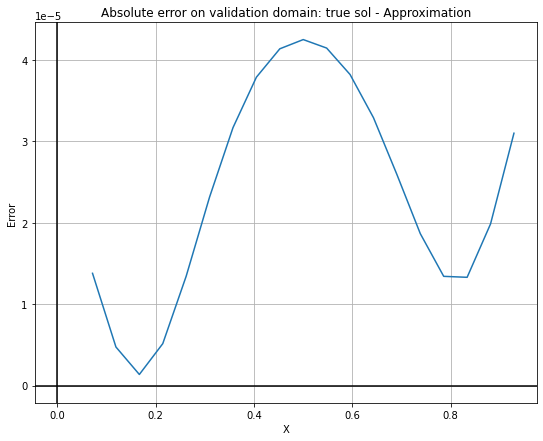

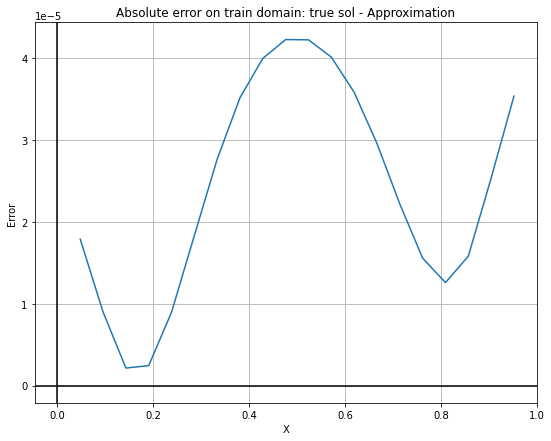

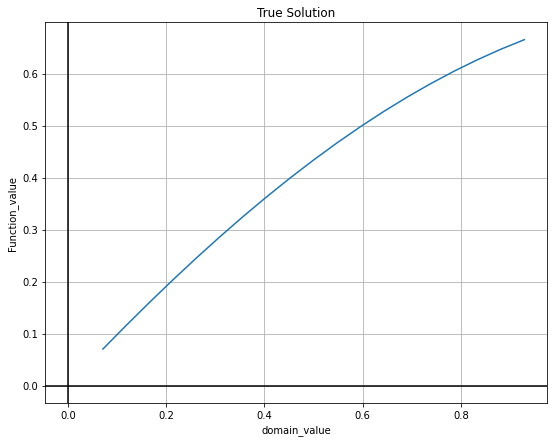

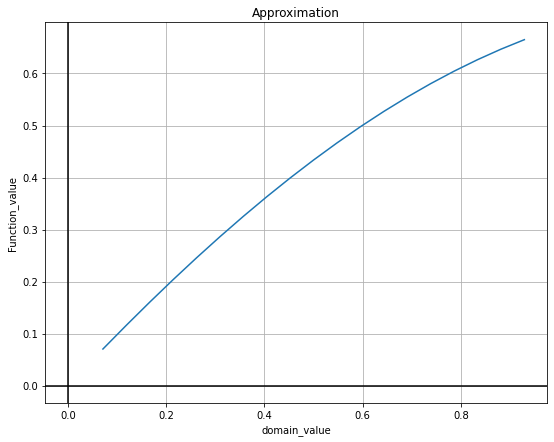

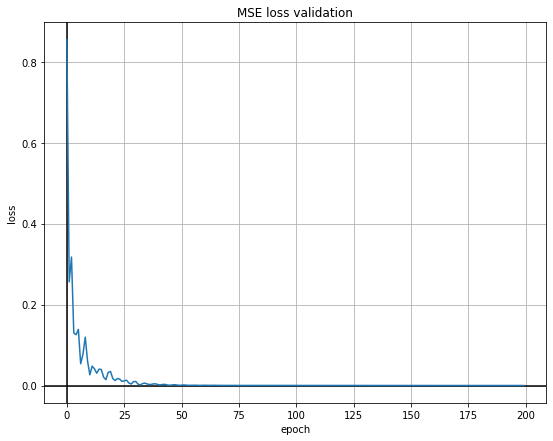

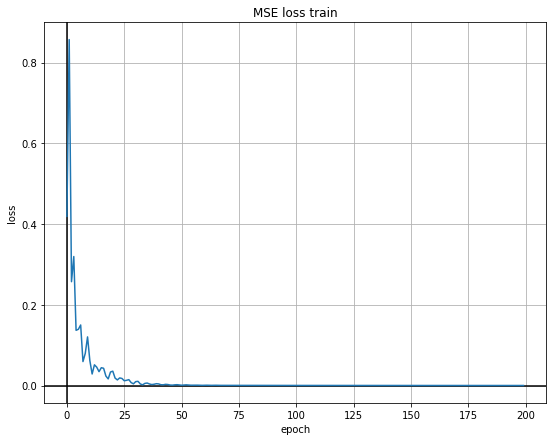

In [3]:
nn_ode_solver.make_report()

$$ u_{xx} + 0.2u_x + u = -0.2 exp(-x/5) cos(x)$$

$$ u(0)=0, u'(0)=1 $$ 

$$ x \in [0,2] $$
$$ true\_solution = exp(-\frac{x}{5})*sin(x)$$

In [4]:
left_bound = 0
right_bound = 2
main_eq_residual = (
        lambda x, nn_model_value: nth_derivative(nn_model_value, x, 2)
        + 0.2 * nth_derivative(nn_model_value, x, 1)
        + nn_model_value
        + 0.2 * torch.exp(-x / 5) * torch.cos(x)
    )
n_points = 20
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - 1
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
nn_ode_solver = NNSolver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/199:
train Loss: 1.0488
valid Loss: 0.2786
Epoch 1/199:
train Loss: 0.2835
valid Loss: 0.9847
Epoch 2/199:
train Loss: 1.0134
valid Loss: 0.2569
Epoch 3/199:
train Loss: 0.2592
valid Loss: 0.6450
Epoch 4/199:
train Loss: 0.6461
valid Loss: 0.4845
Epoch 5/199:
train Loss: 0.4854
valid Loss: 0.1769
Epoch 6/199:
train Loss: 0.1790
valid Loss: 0.1203
Epoch 7/199:
train Loss: 0.1230
valid Loss: 0.2408
Epoch 8/199:
train Loss: 0.2424
valid Loss: 0.2269
Epoch 9/199:
train Loss: 0.2280
valid Loss: 0.1229
Epoch 10/199:
train Loss: 0.1244
valid Loss: 0.1090
Epoch 11/199:
train Loss: 0.1103
valid Loss: 0.1719
Epoch 12/199:
train Loss: 0.1725
valid Loss: 0.1928
Epoch 13/199:
train Loss: 0.1932
valid Loss: 0.1518
Epoch 14/199:
train Loss: 0.1522
valid Loss: 0.1016
Epoch 15/199:
train Loss: 0.1019
valid Loss: 0.0935
Epoch 16/199:
train Loss: 0.0936
valid Loss: 0.1263
Epoch 17/199:
train Loss: 0.1265
valid Loss: 0.1314
Epoch 18/199:
train Loss: 0.1319
valid Loss: 0.0925
Epoch 19/199:
train Lo

valid Loss: 0.0000
Epoch 157/199:
train Loss: 0.0000
valid Loss: 0.0002
Epoch 158/199:
train Loss: 0.0002
valid Loss: 0.0001
Epoch 159/199:
train Loss: 0.0001
valid Loss: 0.0000
Epoch 160/199:
train Loss: 0.0000
valid Loss: 0.0001
Epoch 161/199:
train Loss: 0.0001
valid Loss: 0.0001
Epoch 162/199:
train Loss: 0.0001
valid Loss: 0.0000
Epoch 163/199:
train Loss: 0.0000
valid Loss: 0.0001
Epoch 164/199:
train Loss: 0.0001
valid Loss: 0.0001
Epoch 165/199:
train Loss: 0.0001
valid Loss: 0.0000
Epoch 166/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 167/199:
train Loss: 0.0000
valid Loss: 0.0001
Epoch 168/199:
train Loss: 0.0001
valid Loss: 0.0000
Epoch 169/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 170/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 171/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 172/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 173/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 174/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 175/199:
train Loss: 

Train max absolute error: 0.0018233060836791992
Valid max absolute error: 0.0018188953399658203
Mean average percentage error on train data: 0.24949349462985992 %
Mean average percentage error on validation data: 0.24689865112304688 %


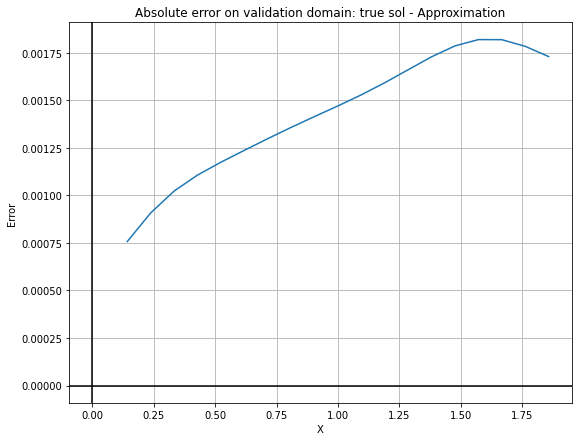

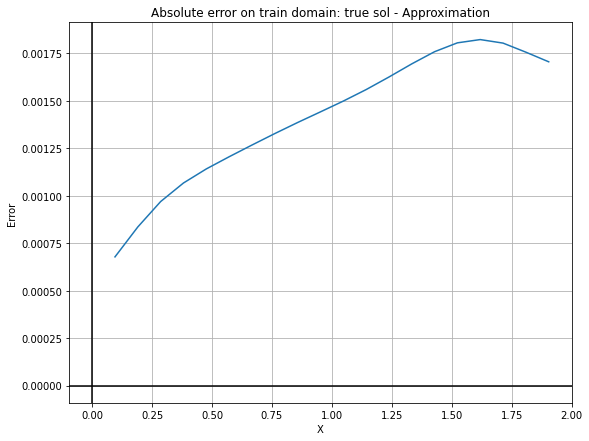

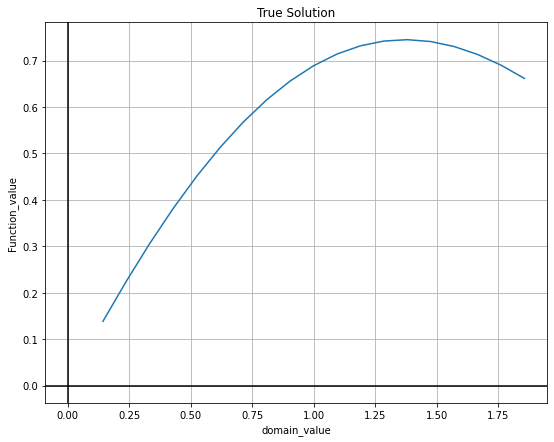

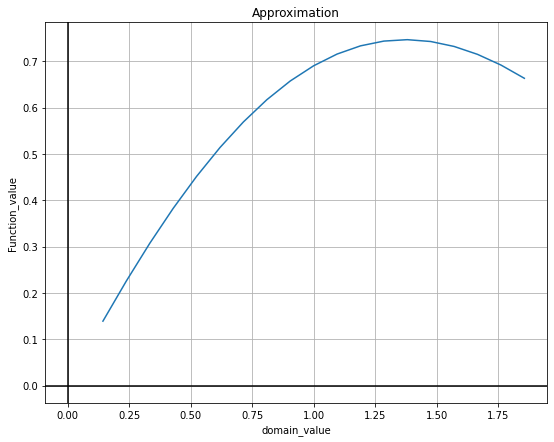

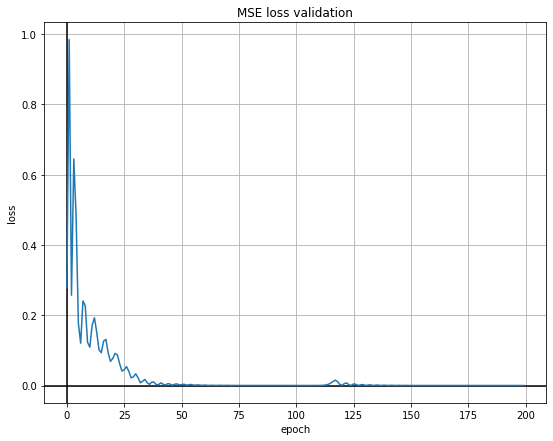

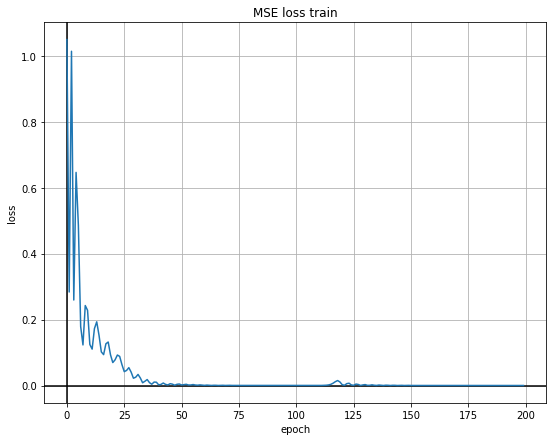

In [5]:
nn_ode_solver.make_report()

$$ x' + 0.2x = exp(-0.2x)cos(x)$$
$$ x(0) = 0, x \in [0.2] $$
$$ true\_solution = exp(-\frac{x}{5})*sin(x) $$

In [6]:
left_bound = 0
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 1)
    + 0.2 * function
    -  torch.exp(-variable / 5) * torch.cos(variable)
)
n_points = 20
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

boundary_conditions = [first_init_cond]

true_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
nn_ode_solver = NNSolver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/199:
train Loss: 0.3147
valid Loss: 0.0873
Epoch 1/199:
train Loss: 0.0942
valid Loss: 0.1517
Epoch 2/199:
train Loss: 0.1557
valid Loss: 0.0925
Epoch 3/199:
train Loss: 0.0960
valid Loss: 0.0416
Epoch 4/199:
train Loss: 0.0443
valid Loss: 0.0336
Epoch 5/199:
train Loss: 0.0351
valid Loss: 0.0601
Epoch 6/199:
train Loss: 0.0652
valid Loss: 0.0275
Epoch 7/199:
train Loss: 0.0295
valid Loss: 0.0374
Epoch 8/199:
train Loss: 0.0381
valid Loss: 0.0480
Epoch 9/199:
train Loss: 0.0496
valid Loss: 0.0304
Epoch 10/199:
train Loss: 0.0322
valid Loss: 0.0188
Epoch 11/199:
train Loss: 0.0207
valid Loss: 0.0203
Epoch 12/199:
train Loss: 0.0226
valid Loss: 0.0269
Epoch 13/199:
train Loss: 0.0295
valid Loss: 0.0205
Epoch 14/199:
train Loss: 0.0231
valid Loss: 0.0152
Epoch 15/199:
train Loss: 0.0182
valid Loss: 0.0164
Epoch 16/199:
train Loss: 0.0197
valid Loss: 0.0184
Epoch 17/199:
train Loss: 0.0218
valid Loss: 0.0137
Epoch 18/199:
train Loss: 0.0166
valid Loss: 0.0086
Epoch 19/199:
train Lo

Epoch 157/199:
train Loss: 0.0046
valid Loss: 0.0005
Epoch 158/199:
train Loss: 0.0006
valid Loss: 0.0029
Epoch 159/199:
train Loss: 0.0031
valid Loss: 0.0012
Epoch 160/199:
train Loss: 0.0014
valid Loss: 0.0022
Epoch 161/199:
train Loss: 0.0024
valid Loss: 0.0009
Epoch 162/199:
train Loss: 0.0011
valid Loss: 0.0017
Epoch 163/199:
train Loss: 0.0018
valid Loss: 0.0014
Epoch 164/199:
train Loss: 0.0014
valid Loss: 0.0012
Epoch 165/199:
train Loss: 0.0013
valid Loss: 0.0010
Epoch 166/199:
train Loss: 0.0011
valid Loss: 0.0009
Epoch 167/199:
train Loss: 0.0011
valid Loss: 0.0009
Epoch 168/199:
train Loss: 0.0011
valid Loss: 0.0007
Epoch 169/199:
train Loss: 0.0008
valid Loss: 0.0008
Epoch 170/199:
train Loss: 0.0008
valid Loss: 0.0006
Epoch 171/199:
train Loss: 0.0006
valid Loss: 0.0008
Epoch 172/199:
train Loss: 0.0008
valid Loss: 0.0002
Epoch 173/199:
train Loss: 0.0003
valid Loss: 0.0006
Epoch 174/199:
train Loss: 0.0007
valid Loss: 0.0002
Epoch 175/199:
train Loss: 0.0002
valid Loss: 

Train max absolute error: 0.0028523802757263184
Valid max absolute error: 0.0028624534606933594
Mean average percentage error on train data: 0.21451976895332336 %
Mean average percentage error on validation data: 0.21709004044532776 %


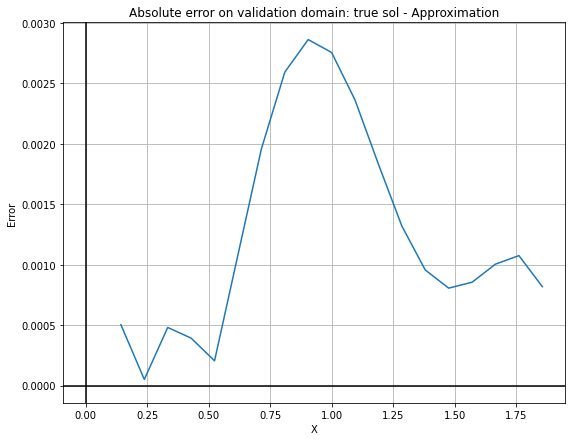

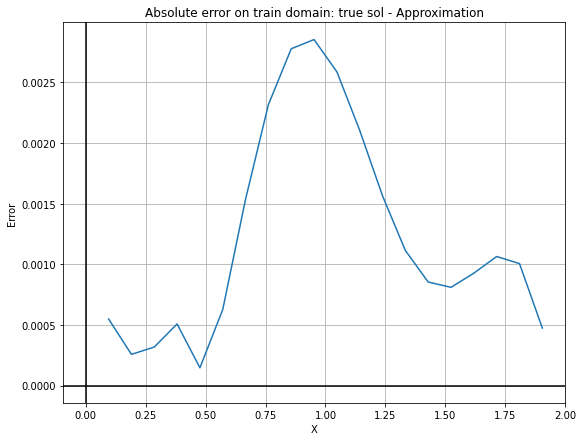

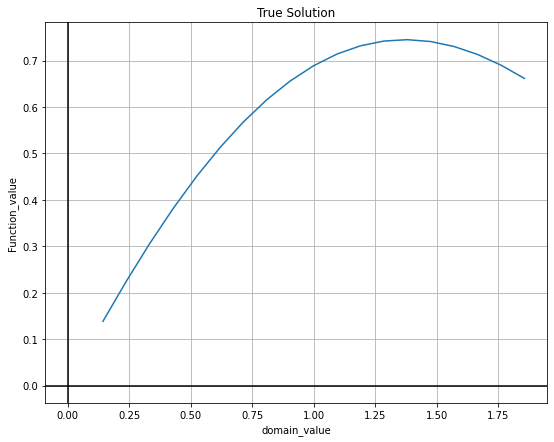

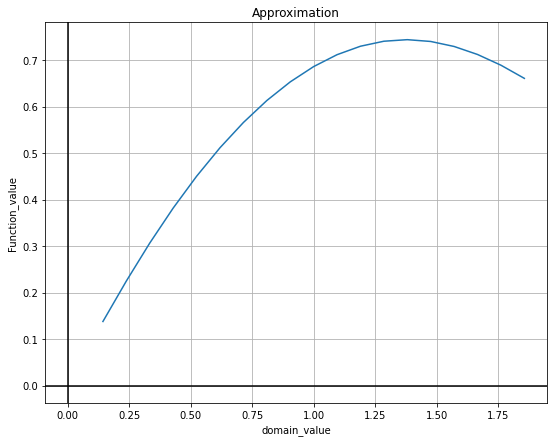

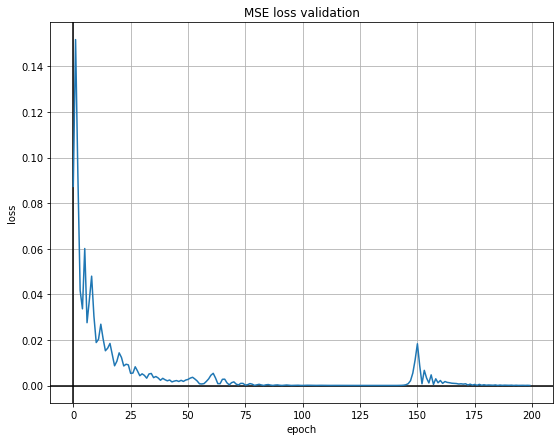

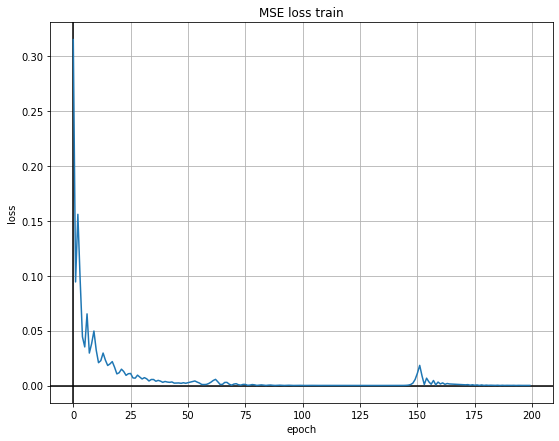

In [7]:
nn_ode_solver.make_report()

$$x''+4x=cos(2t)$$ 
$$ x(0)=1, x'(0)=-1$$
$$true\_solution = \frac{1}{4}*x * sin(2*x) + cos(2*x) - \frac{1}{2}sin(2*x)$$

In [8]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + torch.tensor([4.0],requires_grad=True) * function
    - torch.cos(torch.tensor([2.0],requires_grad=True)*variable)
)
n_points = 20
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: 1/4 * x * torch.sin(2*x) + torch.cos(2*x) - 1/2 * torch.sin(2*x)
nn_ode_solver = NNSolver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/199:
train Loss: 1.9983
valid Loss: 1.5987
Epoch 1/199:
train Loss: 1.6149
valid Loss: 4.7968
Epoch 2/199:
train Loss: 4.7870
valid Loss: 0.7085
Epoch 3/199:
train Loss: 0.7070
valid Loss: 0.6459
Epoch 4/199:
train Loss: 0.6508
valid Loss: 0.8701
Epoch 5/199:
train Loss: 0.8805
valid Loss: 0.5168
Epoch 6/199:
train Loss: 0.5251
valid Loss: 0.1707
Epoch 7/199:
train Loss: 0.1704
valid Loss: 0.2477
Epoch 8/199:
train Loss: 0.2457
valid Loss: 0.4627
Epoch 9/199:
train Loss: 0.4661
valid Loss: 0.3120
Epoch 10/199:
train Loss: 0.3121
valid Loss: 0.1327
Epoch 11/199:
train Loss: 0.1403
valid Loss: 0.2146
Epoch 12/199:
train Loss: 0.2358
valid Loss: 0.2172
Epoch 13/199:
train Loss: 0.2360
valid Loss: 0.1492
Epoch 14/199:
train Loss: 0.1573
valid Loss: 0.2585
Epoch 15/199:
train Loss: 0.2590
valid Loss: 0.2572
Epoch 16/199:
train Loss: 0.2582
valid Loss: 0.1041
Epoch 17/199:
train Loss: 0.1127
valid Loss: 0.1080
Epoch 18/199:
train Loss: 0.1271
valid Loss: 0.1563
Epoch 19/199:
train Lo

Epoch 157/199:
train Loss: 0.0001
valid Loss: 0.0001
Epoch 158/199:
train Loss: 0.0001
valid Loss: 0.0001
Epoch 159/199:
train Loss: 0.0001
valid Loss: 0.0001
Epoch 160/199:
train Loss: 0.0001
valid Loss: 0.0001
Epoch 161/199:
train Loss: 0.0001
valid Loss: 0.0001
Epoch 162/199:
train Loss: 0.0001
valid Loss: 0.0001
Epoch 163/199:
train Loss: 0.0001
valid Loss: 0.0001
Epoch 164/199:
train Loss: 0.0001
valid Loss: 0.0001
Epoch 165/199:
train Loss: 0.0001
valid Loss: 0.0001
Epoch 166/199:
train Loss: 0.0001
valid Loss: 0.0001
Epoch 167/199:
train Loss: 0.0001
valid Loss: 0.0001
Epoch 168/199:
train Loss: 0.0001
valid Loss: 0.0001
Epoch 169/199:
train Loss: 0.0001
valid Loss: 0.0001
Epoch 170/199:
train Loss: 0.0001
valid Loss: 0.0001
Epoch 171/199:
train Loss: 0.0001
valid Loss: 0.0001
Epoch 172/199:
train Loss: 0.0001
valid Loss: 0.0001
Epoch 173/199:
train Loss: 0.0001
valid Loss: 0.0001
Epoch 174/199:
train Loss: 0.0001
valid Loss: 0.0001
Epoch 175/199:
train Loss: 0.0001
valid Loss: 

Train max absolute error: 0.0014913678169250488
Valid max absolute error: 0.0014809370040893555
Mean average percentage error on train data: 0.1994810700416565 %
Mean average percentage error on validation data: 0.20671361684799194 %


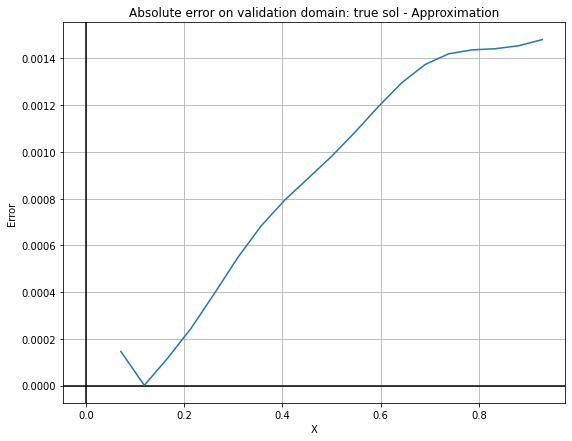

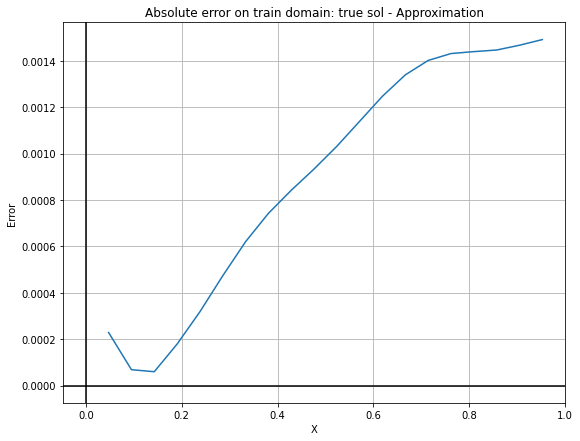

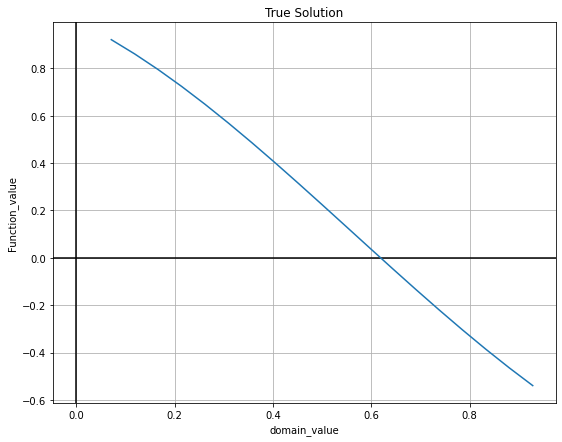

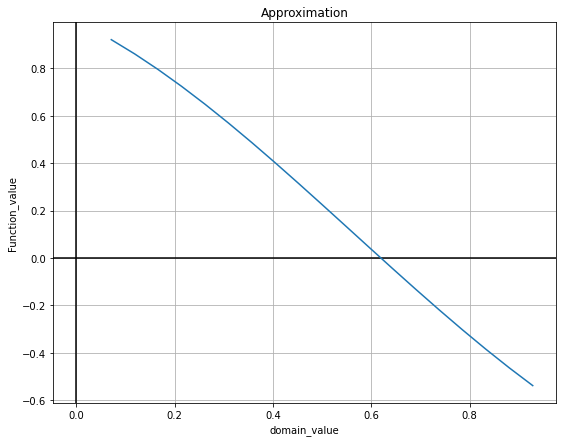

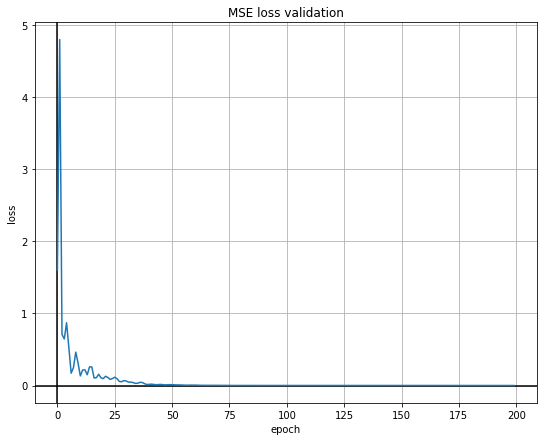

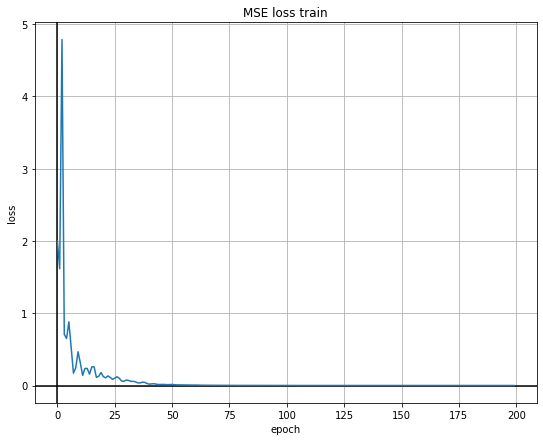

In [9]:
nn_ode_solver.make_report()

$$x''' - 3x'' + 3x' -x = exp(t)$$ 
$$x(0)=1, x'(0)=-1, x''(0)=1$$
$$ func\_appr = 1 - x + \frac{x^2}{2} + x^3 * NN(x)$$
$$true\_solution = exp(x) * (\frac{1}{6}*x^3 + 2*x^2-2*x+1)$$

In [10]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: 
      nth_derivative(function, variable, 3)
    - torch.tensor([3.0],requires_grad=True) * nth_derivative(function, variable, 2)
    + torch.tensor([3.0],requires_grad=True) * nth_derivative(function, variable, 1)
    - function
    - torch.exp(variable)
)
n_points = 20
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

left_bound_val = torch.tensor([0.0],requires_grad=True)
first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound_val, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound_val, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2) - torch.tensor([1.0],requires_grad=True)
third_init_cond = OnePointInitialCondition(left_bound_val, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

true_solution = lambda x: torch.exp(x) * (1/6*x*x*x + 2*x*x- 2*x + 1)
nn_ode_solver = NNSolver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/199:
train Loss: 6.3237
valid Loss: 4.6666
Epoch 1/199:
train Loss: 4.6765
valid Loss: 5.2762
Epoch 2/199:
train Loss: 5.3081
valid Loss: 4.0533
Epoch 3/199:
train Loss: 4.0772
valid Loss: 5.0950
Epoch 4/199:
train Loss: 5.0822
valid Loss: 4.0420
Epoch 5/199:
train Loss: 4.0903
valid Loss: 4.5896
Epoch 6/199:
train Loss: 4.6430
valid Loss: 4.3236
Epoch 7/199:
train Loss: 4.3625
valid Loss: 3.9797
Epoch 8/199:
train Loss: 4.0043
valid Loss: 4.1392
Epoch 9/199:
train Loss: 4.1565
valid Loss: 4.2129
Epoch 10/199:
train Loss: 4.2299
valid Loss: 3.9385
Epoch 11/199:
train Loss: 3.9785
valid Loss: 3.8865
Epoch 12/199:
train Loss: 3.9422
valid Loss: 3.9708
Epoch 13/199:
train Loss: 4.0209
valid Loss: 3.9690
Epoch 14/199:
train Loss: 4.0022
valid Loss: 3.9031
Epoch 15/199:
train Loss: 3.9217
valid Loss: 3.9845
Epoch 16/199:
train Loss: 3.9969
valid Loss: 3.8348
Epoch 17/199:
train Loss: 3.8563
valid Loss: 3.8221
Epoch 18/199:
train Loss: 3.8518
valid Loss: 3.8943
Epoch 19/199:
train Lo

valid Loss: 3.6356
Epoch 157/199:
train Loss: 3.6478
valid Loss: 3.7376
Epoch 158/199:
train Loss: 3.7111
valid Loss: 3.5813
Epoch 159/199:
train Loss: 3.5653
valid Loss: 3.6667
Epoch 160/199:
train Loss: 3.6547
valid Loss: 3.5764
Epoch 161/199:
train Loss: 3.5713
valid Loss: 3.5422
Epoch 162/199:
train Loss: 3.5438
valid Loss: 3.5132
Epoch 163/199:
train Loss: 3.5179
valid Loss: 3.5770
Epoch 164/199:
train Loss: 3.5788
valid Loss: 3.4859
Epoch 165/199:
train Loss: 3.4960
valid Loss: 3.4685
Epoch 166/199:
train Loss: 3.4837
valid Loss: 3.5012
Epoch 167/199:
train Loss: 3.5172
valid Loss: 3.4264
Epoch 168/199:
train Loss: 3.4479
valid Loss: 3.4141
Epoch 169/199:
train Loss: 3.4390
valid Loss: 3.3829
Epoch 170/199:
train Loss: 3.4116
valid Loss: 3.3700
Epoch 171/199:
train Loss: 3.4000
valid Loss: 3.3192
Epoch 172/199:
train Loss: 3.3474
valid Loss: 3.3207
Epoch 173/199:
train Loss: 3.3501
valid Loss: 3.3154
Epoch 174/199:
train Loss: 3.3513
valid Loss: 3.2723
Epoch 175/199:
train Loss: 

Train max absolute error: 1.988179087638855
Valid max absolute error: 1.7966222763061523
Mean average percentage error on train data: 45.3424186706543 %
Mean average percentage error on validation data: 43.59197235107422 %


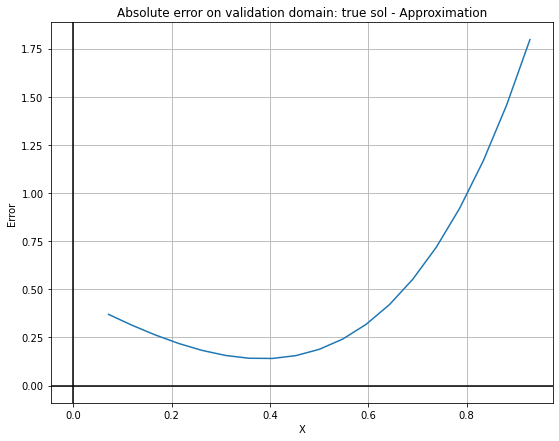

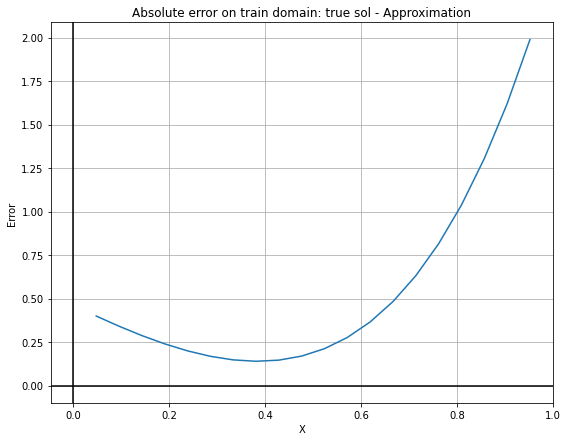

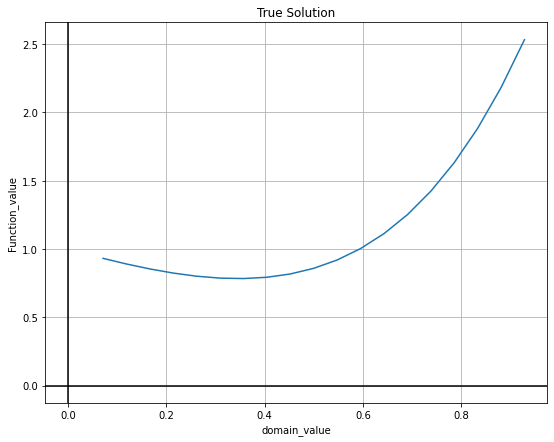

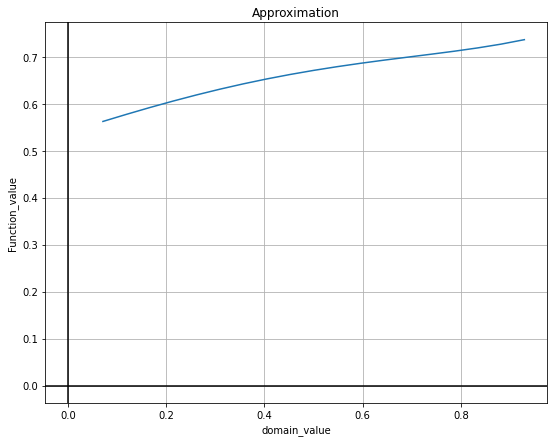

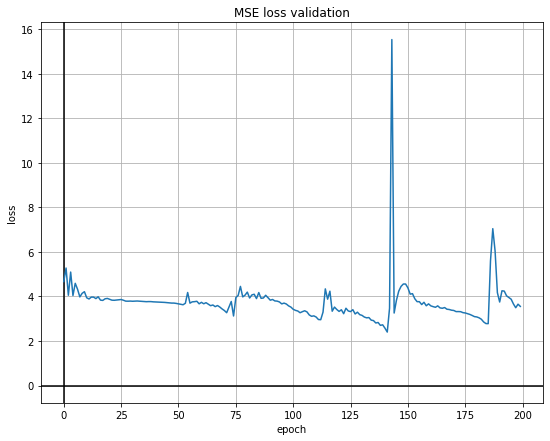

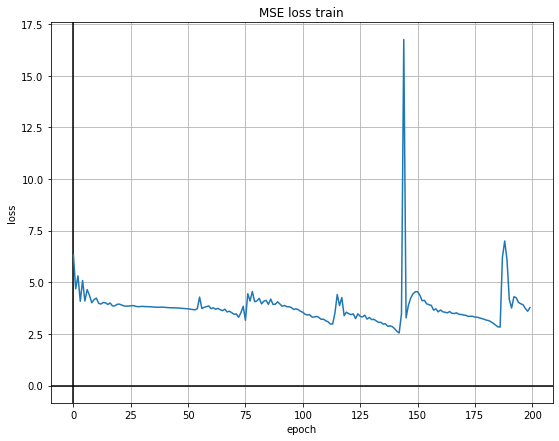

In [11]:
nn_ode_solver.make_report()

$$u'' + u = -x $$ 
$$u(0) = u(1) = 0$$
$$true\_solution = \frac{sin(x)}{sin(1)} - x$$

In [12]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + function
    + variable
)
n_points = 20
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.sin(x)/torch.sin(torch.Tensor([1])) - x
nn_ode_solver = NNSolver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/199:
train Loss: 0.4729
valid Loss: 0.9074
Epoch 1/199:
train Loss: 0.9130
valid Loss: 0.3042
Epoch 2/199:
train Loss: 0.3124
valid Loss: 0.4283
Epoch 3/199:
train Loss: 0.4372
valid Loss: 0.2402
Epoch 4/199:
train Loss: 0.2481
valid Loss: 0.2373
Epoch 5/199:
train Loss: 0.2439
valid Loss: 0.2454
Epoch 6/199:
train Loss: 0.2517
valid Loss: 0.1417
Epoch 7/199:
train Loss: 0.1491
valid Loss: 0.1293
Epoch 8/199:
train Loss: 0.1396
valid Loss: 0.1411
Epoch 9/199:
train Loss: 0.1526
valid Loss: 0.0714
Epoch 10/199:
train Loss: 0.0804
valid Loss: 0.0522
Epoch 11/199:
train Loss: 0.0577
valid Loss: 0.0774
Epoch 12/199:
train Loss: 0.0809
valid Loss: 0.0531
Epoch 13/199:
train Loss: 0.0562
valid Loss: 0.0375
Epoch 14/199:
train Loss: 0.0400
valid Loss: 0.0602
Epoch 15/199:
train Loss: 0.0616
valid Loss: 0.0457
Epoch 16/199:
train Loss: 0.0468
valid Loss: 0.0128
Epoch 17/199:
train Loss: 0.0140
valid Loss: 0.0185
Epoch 18/199:
train Loss: 0.0194
valid Loss: 0.0266
Epoch 19/199:
train Lo

Epoch 157/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 158/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 159/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 160/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 161/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 162/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 163/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 164/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 165/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 166/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 167/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 168/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 169/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 170/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 171/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 172/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 173/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 174/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 175/199:
train Loss: 0.0000
valid Loss: 

Train max absolute error: 2.489238977432251e-05
Valid max absolute error: 2.3812055587768555e-05
Mean average percentage error on train data: 0.023826949298381805 %
Mean average percentage error on validation data: 0.02353990636765957 %


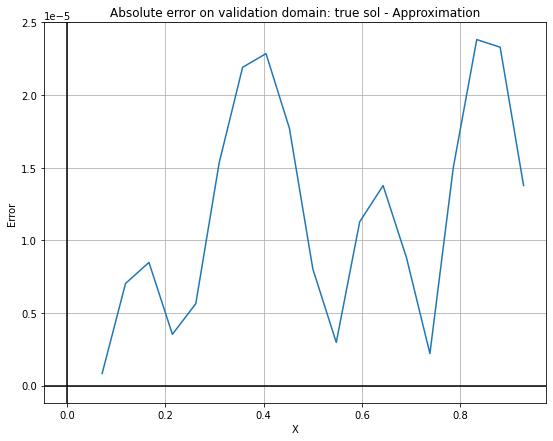

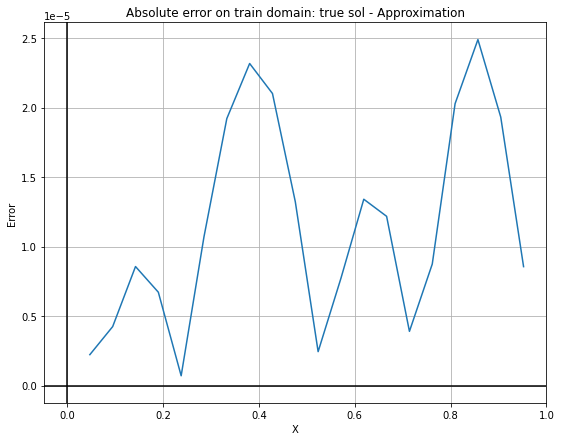

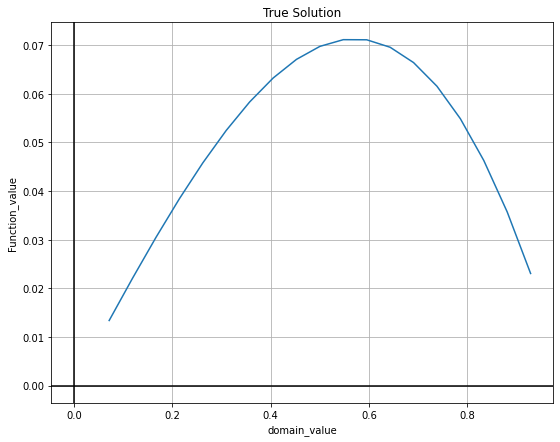

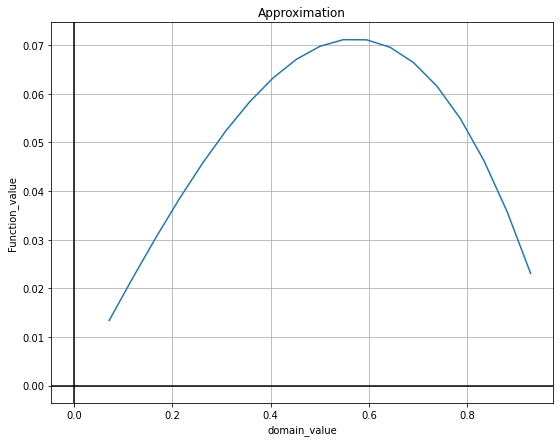

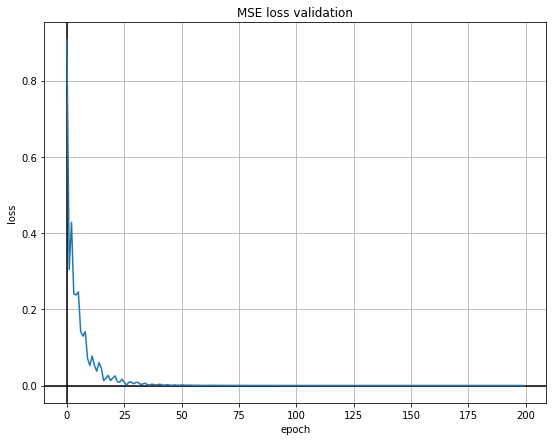

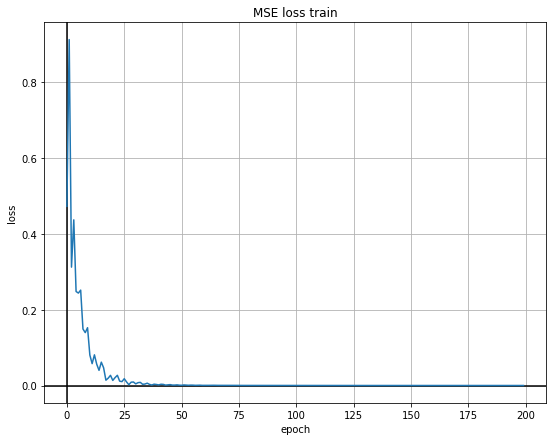

In [13]:
nn_ode_solver.make_report()

$$x'' + x' = 1$$
$$ x'(0) = 0, x(\frac{\pi}{2})-x'(\frac{\pi}{2})= 2$$
$$ true\_solution = 1 + cos(x) $$

In [14]:
left_bound = 0
right_bound = pi/2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    + function
    - 1
)
n_points = 20
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nn_model_value - nth_derivative(nn_model_value,x,1) - 2
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: torch.Tensor([1]) + torch.cos(x)
nn_ode_solver = NNSolver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/199:
train Loss: 4.3792
valid Loss: 1.2355
Epoch 1/199:
train Loss: 1.2363
valid Loss: 1.1997
Epoch 2/199:
train Loss: 1.2008
valid Loss: 0.5198
Epoch 3/199:
train Loss: 0.5178
valid Loss: 0.7912
Epoch 4/199:
train Loss: 0.7914
valid Loss: 0.5873
Epoch 5/199:
train Loss: 0.5879
valid Loss: 0.2005
Epoch 6/199:
train Loss: 0.2037
valid Loss: 0.4077
Epoch 7/199:
train Loss: 0.4139
valid Loss: 0.2217
Epoch 8/199:
train Loss: 0.2292
valid Loss: 0.0761
Epoch 9/199:
train Loss: 0.0785
valid Loss: 0.2883
Epoch 10/199:
train Loss: 0.2817
valid Loss: 0.2753
Epoch 11/199:
train Loss: 0.2693
valid Loss: 0.0950
Epoch 12/199:
train Loss: 0.0952
valid Loss: 0.0953
Epoch 13/199:
train Loss: 0.0996
valid Loss: 0.1693
Epoch 14/199:
train Loss: 0.1739
valid Loss: 0.1404
Epoch 15/199:
train Loss: 0.1438
valid Loss: 0.0833
Epoch 16/199:
train Loss: 0.0854
valid Loss: 0.1007
Epoch 17/199:
train Loss: 0.1018
valid Loss: 0.1243
Epoch 18/199:
train Loss: 0.1251
valid Loss: 0.0746
Epoch 19/199:
train Lo

valid Loss: 0.0000
Epoch 157/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 158/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 159/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 160/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 161/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 162/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 163/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 164/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 165/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 166/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 167/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 168/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 169/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 170/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 171/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 172/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 173/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 174/199:
train Loss: 0.0000
valid Loss: 0.0000
Epoch 175/199:
train Loss: 

Train max absolute error: 0.001338362693786621
Valid max absolute error: 0.00130462646484375
Mean average percentage error on train data: 0.040057968348264694 %
Mean average percentage error on validation data: 0.03827502205967903 %


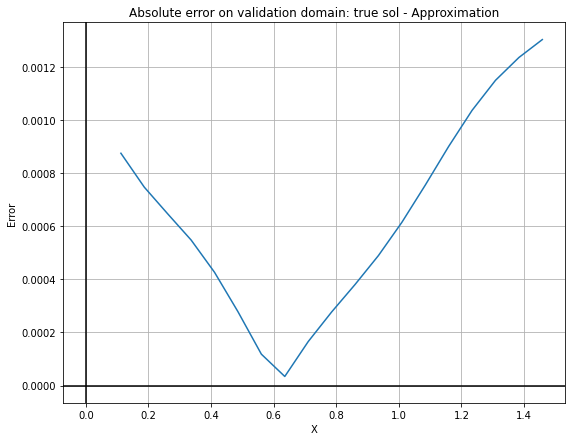

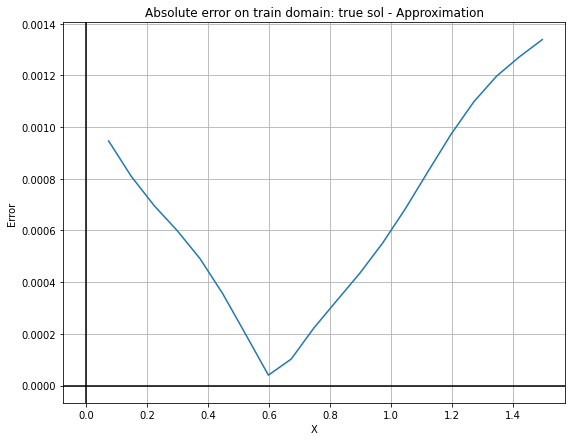

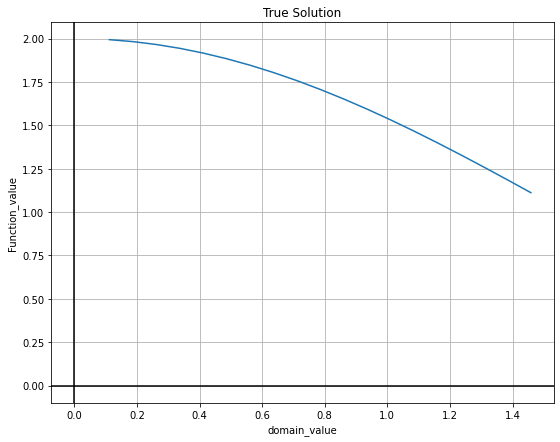

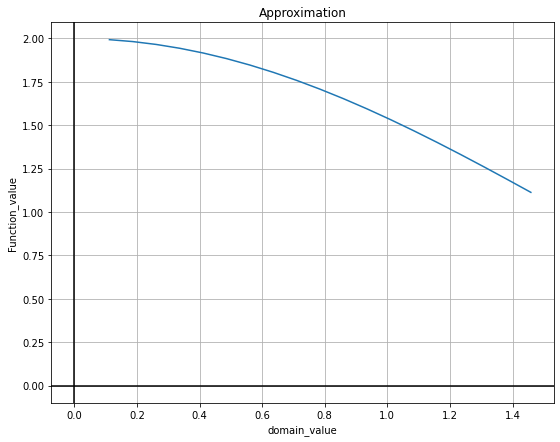

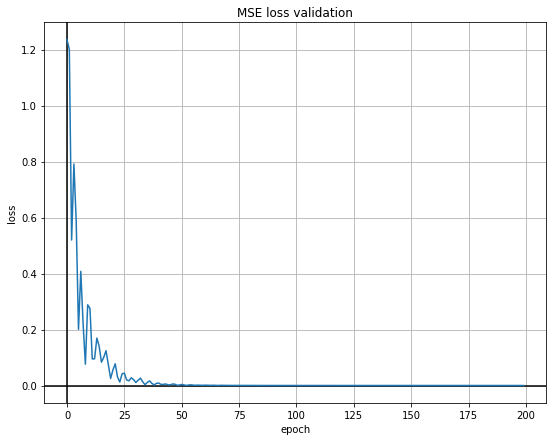

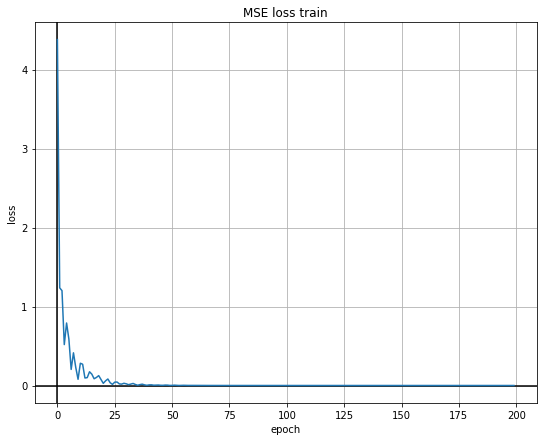

In [15]:
nn_ode_solver.make_report()

$$ y'' -y = 4exp(x)$$
$$ y(0) = 0, y'(0) = 1 $$
$$ true\_solution = 2 * x * exp(x) - sinh(x) $$

In [16]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 2)
    - function
    - torch.tensor([4.0],requires_grad=True) * torch.exp(variable)
)
n_points = 100
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: 2 * x * torch.exp(x) - torch.sinh(x)
nn_ode_solver = NNSolver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/199:
train Loss: 53.3643
valid Loss: 39.3535
Epoch 1/199:
train Loss: 39.5026
valid Loss: 27.2390
Epoch 2/199:
train Loss: 27.3748
valid Loss: 25.2139
Epoch 3/199:
train Loss: 25.3388
valid Loss: 28.3024
Epoch 4/199:
train Loss: 28.4285
valid Loss: 29.0094
Epoch 5/199:
train Loss: 29.1343
valid Loss: 27.6286
Epoch 6/199:
train Loss: 27.7490
valid Loss: 25.5464
Epoch 7/199:
train Loss: 25.6627
valid Loss: 24.1088
Epoch 8/199:
train Loss: 24.2199
valid Loss: 23.9791
Epoch 9/199:
train Loss: 24.0806
valid Loss: 22.2168
Epoch 10/199:
train Loss: 22.3243
valid Loss: 19.1446
Epoch 11/199:
train Loss: 19.2894
valid Loss: 17.3278
Epoch 12/199:
train Loss: 17.4966
valid Loss: 13.9229
Epoch 13/199:
train Loss: 14.1032
valid Loss: 12.3054
Epoch 14/199:
train Loss: 12.4023
valid Loss: 11.4140
Epoch 15/199:
train Loss: 11.4014
valid Loss: 11.4937
Epoch 16/199:
train Loss: 11.4753
valid Loss: 10.8296
Epoch 17/199:
train Loss: 10.8121
valid Loss: 7.6984
Epoch 18/199:
train Loss: 7.7215
valid 

Epoch 156/199:
train Loss: 0.0075
valid Loss: 0.0082
Epoch 157/199:
train Loss: 0.0084
valid Loss: 0.0048
Epoch 158/199:
train Loss: 0.0056
valid Loss: 0.0042
Epoch 159/199:
train Loss: 0.0048
valid Loss: 0.0056
Epoch 160/199:
train Loss: 0.0059
valid Loss: 0.0049
Epoch 161/199:
train Loss: 0.0059
valid Loss: 0.0047
Epoch 162/199:
train Loss: 0.0050
valid Loss: 0.0038
Epoch 163/199:
train Loss: 0.0043
valid Loss: 0.0034
Epoch 164/199:
train Loss: 0.0042
valid Loss: 0.0042
Epoch 165/199:
train Loss: 0.0045
valid Loss: 0.0038
Epoch 166/199:
train Loss: 0.0046
valid Loss: 0.0032
Epoch 167/199:
train Loss: 0.0036
valid Loss: 0.0026
Epoch 168/199:
train Loss: 0.0030
valid Loss: 0.0028
Epoch 169/199:
train Loss: 0.0034
valid Loss: 0.0036
Epoch 170/199:
train Loss: 0.0039
valid Loss: 0.0028
Epoch 171/199:
train Loss: 0.0032
valid Loss: 0.0020
Epoch 172/199:
train Loss: 0.0023
valid Loss: 0.0021
Epoch 173/199:
train Loss: 0.0024
valid Loss: 0.0026
Epoch 174/199:
train Loss: 0.0030
valid Loss: 

Train max absolute error: 0.00794219970703125
Valid max absolute error: 0.007918834686279297
Mean average percentage error on train data: 0.47345080971717834 %
Mean average percentage error on validation data: 0.47561702132225037 %


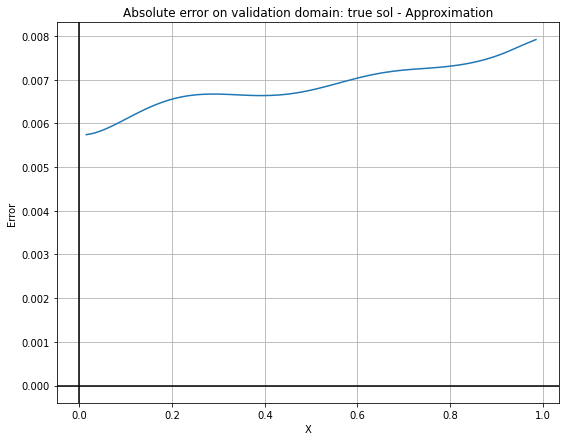

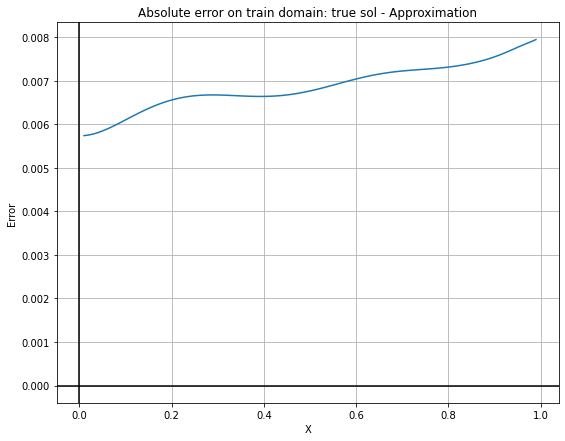

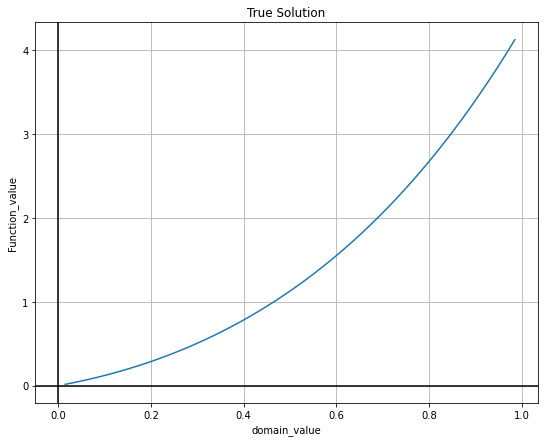

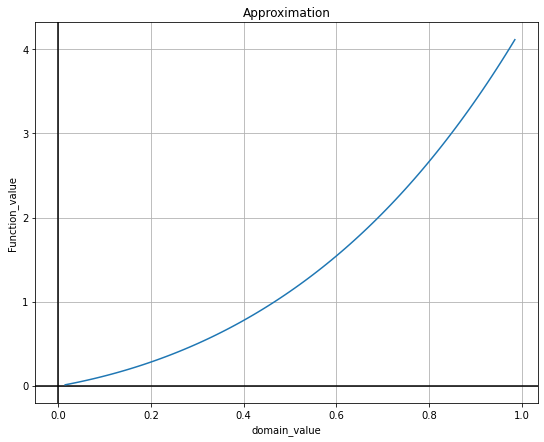

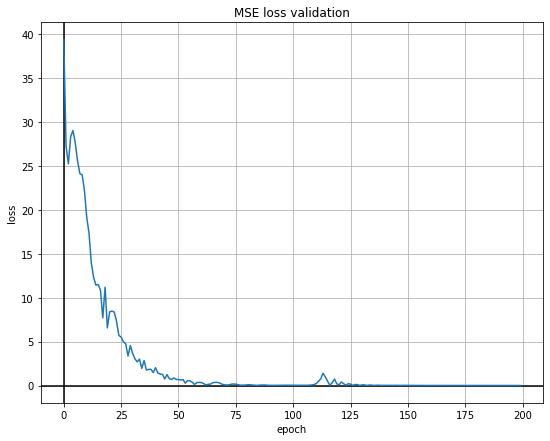

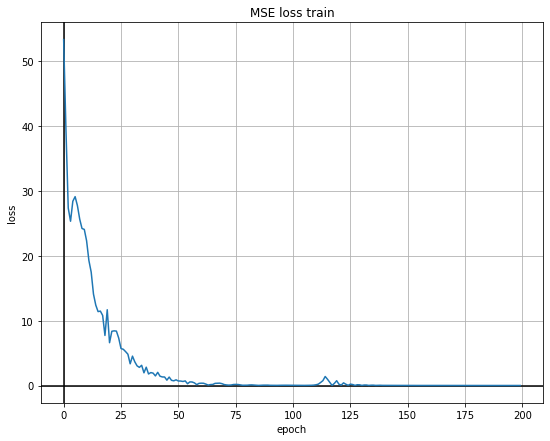

In [17]:
nn_ode_solver.make_report()

$$ (1+x^2)y''-2xy = 0 $$
$$ y(0)=0, y'(0)=3 $$
$$true\_solution = x^3 + 3*x$$

In [18]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: (torch.tensor([1.0],requires_grad=True) + variable*variable) * nth_derivative(function, variable, 2)
    - 2 * variable * function
)
n_points = 20
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - torch.tensor([3.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: x*x*x + 3*x
nn_ode_solver = NNSolver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/199:
train Loss: 9.0054
valid Loss: 6.3838
Epoch 1/199:
train Loss: 6.4421
valid Loss: 5.6339
Epoch 2/199:
train Loss: 5.8633
valid Loss: 7.8698
Epoch 3/199:
train Loss: 7.8309
valid Loss: 4.5721
Epoch 4/199:
train Loss: 4.6169
valid Loss: 5.3931
Epoch 5/199:
train Loss: 5.5093
valid Loss: 5.1020
Epoch 6/199:
train Loss: 5.1938
valid Loss: 4.1162
Epoch 7/199:
train Loss: 4.1587
valid Loss: 4.2378
Epoch 8/199:
train Loss: 4.2461
valid Loss: 4.1910
Epoch 9/199:
train Loss: 4.1906
valid Loss: 3.0549
Epoch 10/199:
train Loss: 3.1305
valid Loss: 3.7680
Epoch 11/199:
train Loss: 3.9841
valid Loss: 2.6253
Epoch 12/199:
train Loss: 2.7313
valid Loss: 2.6305
Epoch 13/199:
train Loss: 2.6524
valid Loss: 2.9090
Epoch 14/199:
train Loss: 2.9250
valid Loss: 2.4449
Epoch 15/199:
train Loss: 2.4816
valid Loss: 2.2238
Epoch 16/199:
train Loss: 2.3049
valid Loss: 1.8836
Epoch 17/199:
train Loss: 2.0113
valid Loss: 1.4805
Epoch 18/199:
train Loss: 1.5778
valid Loss: 1.8439
Epoch 19/199:
train Lo

Epoch 157/199:
train Loss: 0.0010
valid Loss: 0.0007
Epoch 158/199:
train Loss: 0.0010
valid Loss: 0.0007
Epoch 159/199:
train Loss: 0.0010
valid Loss: 0.0008
Epoch 160/199:
train Loss: 0.0010
valid Loss: 0.0007
Epoch 161/199:
train Loss: 0.0010
valid Loss: 0.0007
Epoch 162/199:
train Loss: 0.0010
valid Loss: 0.0007
Epoch 163/199:
train Loss: 0.0010
valid Loss: 0.0007
Epoch 164/199:
train Loss: 0.0009
valid Loss: 0.0007
Epoch 165/199:
train Loss: 0.0009
valid Loss: 0.0007
Epoch 166/199:
train Loss: 0.0009
valid Loss: 0.0007
Epoch 167/199:
train Loss: 0.0009
valid Loss: 0.0006
Epoch 168/199:
train Loss: 0.0009
valid Loss: 0.0006
Epoch 169/199:
train Loss: 0.0009
valid Loss: 0.0006
Epoch 170/199:
train Loss: 0.0009
valid Loss: 0.0006
Epoch 171/199:
train Loss: 0.0008
valid Loss: 0.0006
Epoch 172/199:
train Loss: 0.0008
valid Loss: 0.0006
Epoch 173/199:
train Loss: 0.0008
valid Loss: 0.0006
Epoch 174/199:
train Loss: 0.0008
valid Loss: 0.0006
Epoch 175/199:
train Loss: 0.0008
valid Loss: 

Train max absolute error: 0.5492954254150391
Valid max absolute error: 0.5139319896697998
Mean average percentage error on train data: 9.461432456970215 %
Mean average percentage error on validation data: 9.157792091369629 %


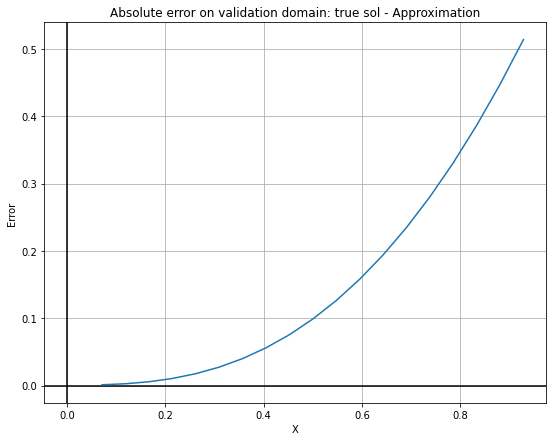

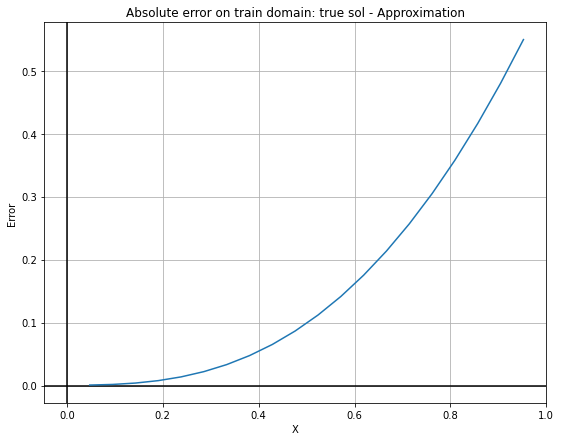

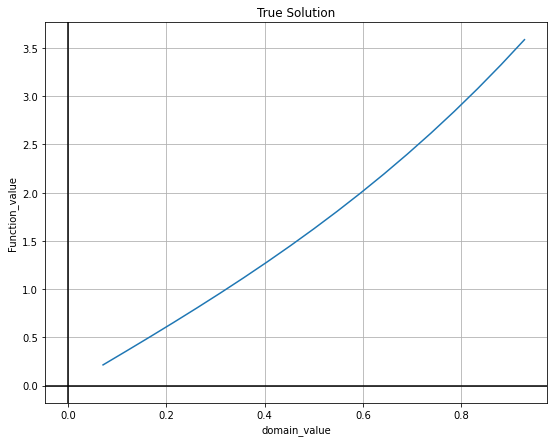

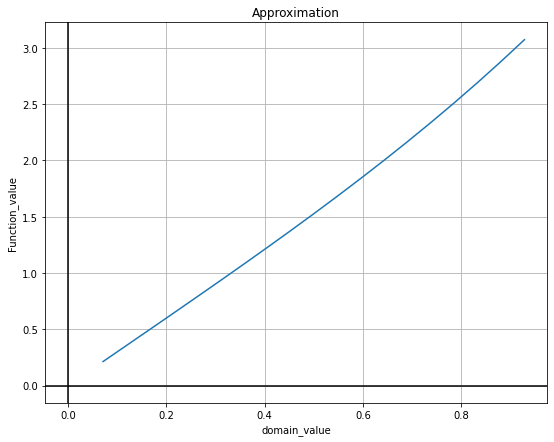

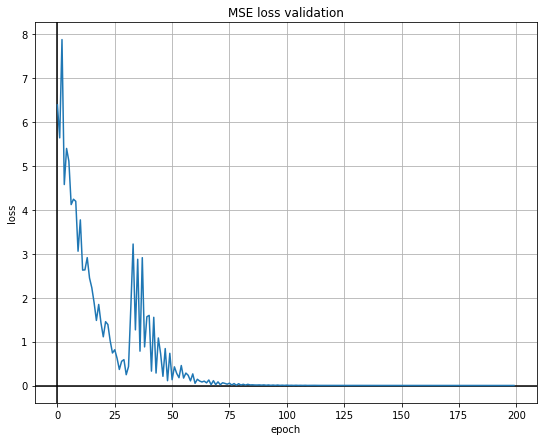

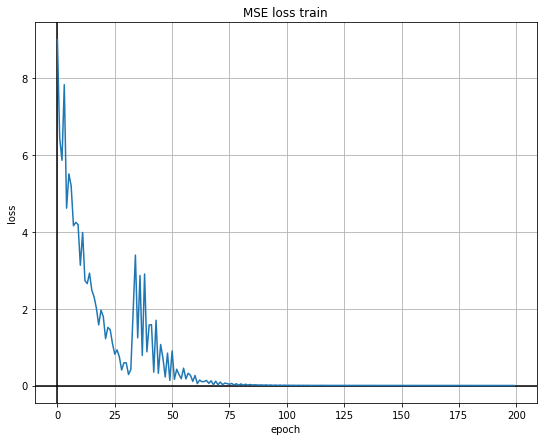

In [19]:
nn_ode_solver.make_report()

$$yy''- (y')^2 = y^4$$
$$ y(0) = 1, y'(0) = 0$$
$$ true\_sol =  \frac{1}{cos(x)}$$

In [20]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: function * nth_derivative(function, variable, 2)
    - (nth_derivative(function, variable, 1))**2 - function**4
)
n_points = 20
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

true_solution = lambda x: 1/torch.cos(x)
nn_ode_solver = NNSolver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/199:
train Loss: 0.8021
valid Loss: 0.4401
Epoch 1/199:
train Loss: 0.4387
valid Loss: 0.6971
Epoch 2/199:
train Loss: 0.6971
valid Loss: 0.7527
Epoch 3/199:
train Loss: 0.7527
valid Loss: 0.4366
Epoch 4/199:
train Loss: 0.4366
valid Loss: 0.1807
Epoch 5/199:
train Loss: 0.1808
valid Loss: 0.6266
Epoch 6/199:
train Loss: 0.6240
valid Loss: 0.1901
Epoch 7/199:
train Loss: 0.1901
valid Loss: 0.3748
Epoch 8/199:
train Loss: 0.3749
valid Loss: 0.4902
Epoch 9/199:
train Loss: 0.4902
valid Loss: 0.4837
Epoch 10/199:
train Loss: 0.4837
valid Loss: 0.4004
Epoch 11/199:
train Loss: 0.4004
valid Loss: 0.2933
Epoch 12/199:
train Loss: 0.2935
valid Loss: 0.2035
Epoch 13/199:
train Loss: 0.2041
valid Loss: 0.1796
Epoch 14/199:
train Loss: 0.1806
valid Loss: 0.2349
Epoch 15/199:
train Loss: 0.2353
valid Loss: 0.1992
Epoch 16/199:
train Loss: 0.1987
valid Loss: 0.1667
Epoch 17/199:
train Loss: 0.1665
valid Loss: 0.1939
Epoch 18/199:
train Loss: 0.1940
valid Loss: 0.2068
Epoch 19/199:
train Lo

valid Loss: 0.1333
Epoch 157/199:
train Loss: 0.1334
valid Loss: 0.1591
Epoch 158/199:
train Loss: 0.1592
valid Loss: 0.1784
Epoch 159/199:
train Loss: 0.1785
valid Loss: 0.1797
Epoch 160/199:
train Loss: 0.1798
valid Loss: 0.1643
Epoch 161/199:
train Loss: 0.1645
valid Loss: 0.1404
Epoch 162/199:
train Loss: 0.1406
valid Loss: 0.1211
Epoch 163/199:
train Loss: 0.1216
valid Loss: 0.1219
Epoch 164/199:
train Loss: 0.1228
valid Loss: 0.1413
Epoch 165/199:
train Loss: 0.1426
valid Loss: 0.1425
Epoch 166/199:
train Loss: 0.1441
valid Loss: 0.1206
Epoch 167/199:
train Loss: 0.1220
valid Loss: 0.1105
Epoch 168/199:
train Loss: 0.1115
valid Loss: 0.1168
Epoch 169/199:
train Loss: 0.1175
valid Loss: 0.1257
Epoch 170/199:
train Loss: 0.1263
valid Loss: 0.1274
Epoch 171/199:
train Loss: 0.1280
valid Loss: 0.1196
Epoch 172/199:
train Loss: 0.1203
valid Loss: 0.1073
Epoch 173/199:
train Loss: 0.1082
valid Loss: 0.1002
Epoch 174/199:
train Loss: 0.1016
valid Loss: 0.1044
Epoch 175/199:
train Loss: 

Train max absolute error: 0.8230434656143188
Valid max absolute error: 0.776180624961853
Mean average percentage error on train data: 32.38950729370117 %
Mean average percentage error on validation data: 32.071041107177734 %


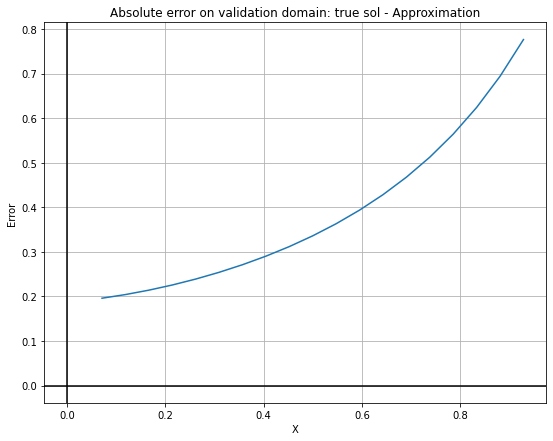

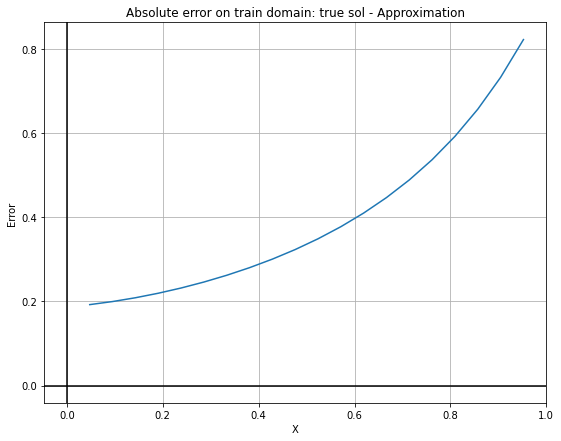

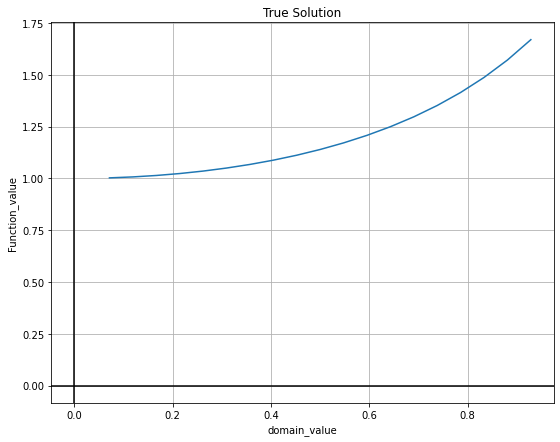

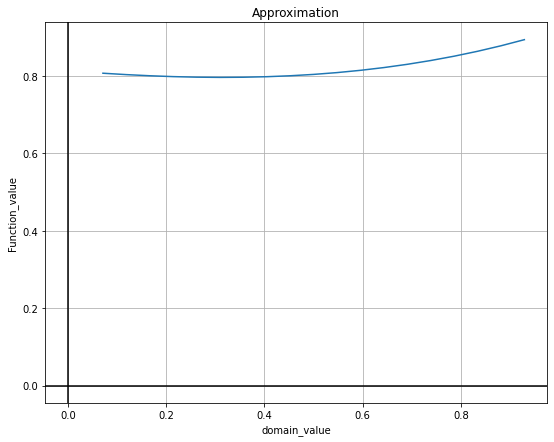

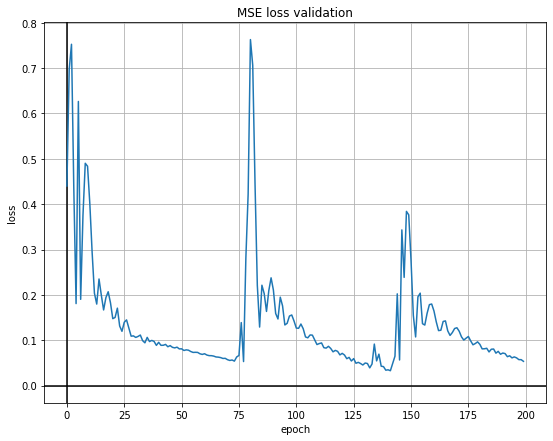

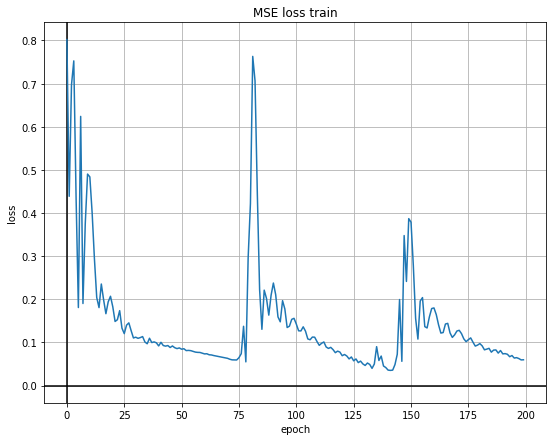

In [21]:
nn_ode_solver.make_report()

$$y'''+ y'' = \frac{x-1}{x^2}$$
$$ y(1) = \frac{1+e}{e}$$
$$ y'(1) = -\frac{1+e}{e} $$
$$ y''(1) = \frac{1-e}{e} $$
$$ true\_sol =  -4x + xln(x) + 7 - 2exp(1-x) + exp(-x)$$

In [22]:
left_bound = 1
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 3)
    + nth_derivative(function, variable, 2)
    - (variable-1)/(variable**2)
)
n_points = 20
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - (1+e)/e
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) + torch.tensor([(1+e)/e],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2) - torch.tensor([(1-e)/e],requires_grad=True)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

true_solution = lambda x: -x*4 + x * torch.log(x) + 7 - 2 * torch.exp(1-x) + torch.exp(-x)
nn_ode_solver = NNSolver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/199:
train Loss: 3.9276
valid Loss: 2.3147
Epoch 1/199:
train Loss: 2.3149
valid Loss: 1.4254
Epoch 2/199:
train Loss: 1.4262
valid Loss: 1.2025
Epoch 3/199:
train Loss: 1.1896
valid Loss: 0.6070
Epoch 4/199:
train Loss: 0.6029
valid Loss: 0.5664
Epoch 5/199:
train Loss: 0.5665
valid Loss: 0.4600
Epoch 6/199:
train Loss: 0.4629
valid Loss: 0.5036
Epoch 7/199:
train Loss: 0.5316
valid Loss: 0.2644
Epoch 8/199:
train Loss: 0.2759
valid Loss: 0.1932
Epoch 9/199:
train Loss: 0.1958
valid Loss: 0.1848
Epoch 10/199:
train Loss: 0.1860
valid Loss: 0.2760
Epoch 11/199:
train Loss: 0.2761
valid Loss: 0.1543
Epoch 12/199:
train Loss: 0.1549
valid Loss: 0.1116
Epoch 13/199:
train Loss: 0.1119
valid Loss: 0.1091
Epoch 14/199:
train Loss: 0.1099
valid Loss: 0.0726
Epoch 15/199:
train Loss: 0.0769
valid Loss: 0.1096
Epoch 16/199:
train Loss: 0.1187
valid Loss: 0.0230
Epoch 17/199:
train Loss: 0.0256
valid Loss: 0.0260
Epoch 18/199:
train Loss: 0.0258
valid Loss: 0.0493
Epoch 19/199:
train Lo

Epoch 157/199:
train Loss: 0.0163
valid Loss: 0.0016
Epoch 158/199:
train Loss: 0.0018
valid Loss: 0.0102
Epoch 159/199:
train Loss: 0.0103
valid Loss: 0.0071
Epoch 160/199:
train Loss: 0.0070
valid Loss: 0.0037
Epoch 161/199:
train Loss: 0.0036
valid Loss: 0.0091
Epoch 162/199:
train Loss: 0.0092
valid Loss: 0.0024
Epoch 163/199:
train Loss: 0.0024
valid Loss: 0.0062
Epoch 164/199:
train Loss: 0.0062
valid Loss: 0.0049
Epoch 165/199:
train Loss: 0.0051
valid Loss: 0.0020
Epoch 166/199:
train Loss: 0.0020
valid Loss: 0.0053
Epoch 167/199:
train Loss: 0.0053
valid Loss: 0.0018
Epoch 168/199:
train Loss: 0.0019
valid Loss: 0.0030
Epoch 169/199:
train Loss: 0.0031
valid Loss: 0.0027
Epoch 170/199:
train Loss: 0.0028
valid Loss: 0.0016
Epoch 171/199:
train Loss: 0.0017
valid Loss: 0.0029
Epoch 172/199:
train Loss: 0.0029
valid Loss: 0.0014
Epoch 173/199:
train Loss: 0.0014
valid Loss: 0.0023
Epoch 174/199:
train Loss: 0.0023
valid Loss: 0.0016
Epoch 175/199:
train Loss: 0.0017
valid Loss: 

Train max absolute error: 0.005508303642272949
Valid max absolute error: 0.005470789968967438
Mean average percentage error on train data: 0.6669156551361084 %
Mean average percentage error on validation data: 0.6761366724967957 %


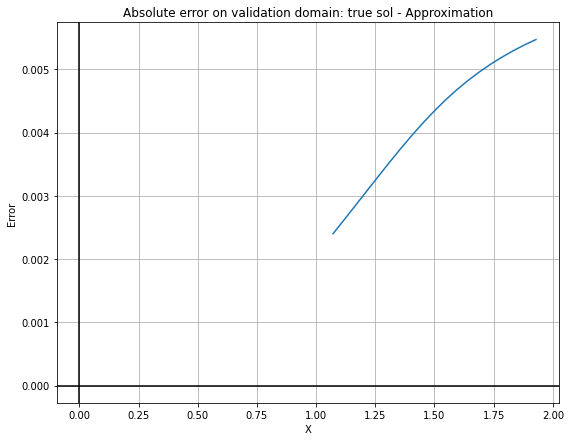

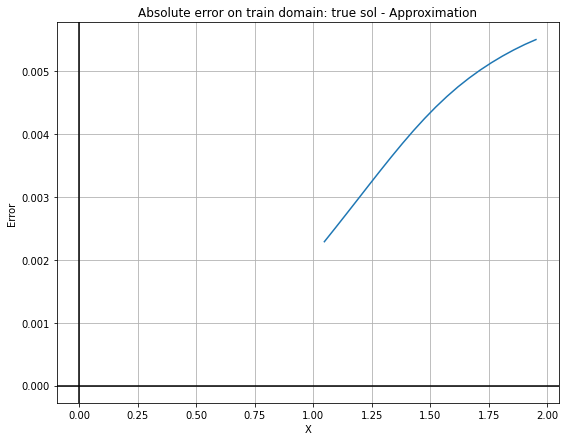

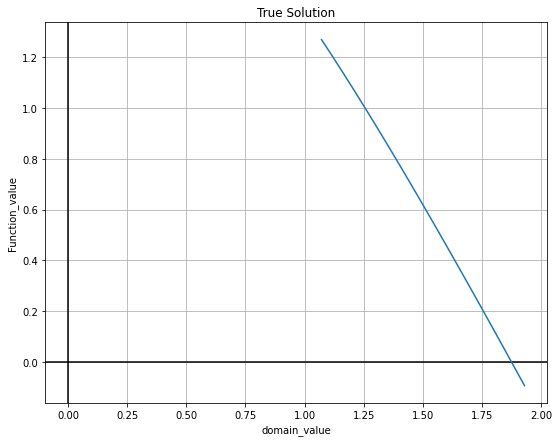

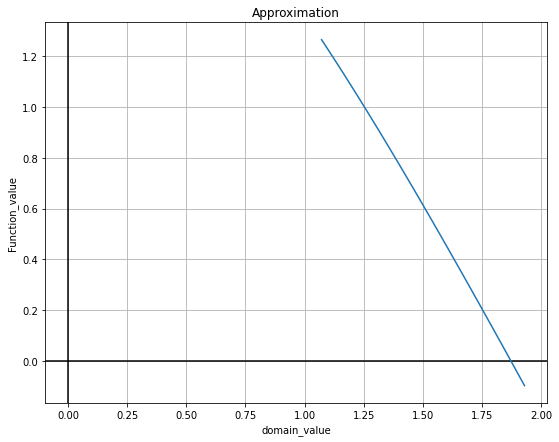

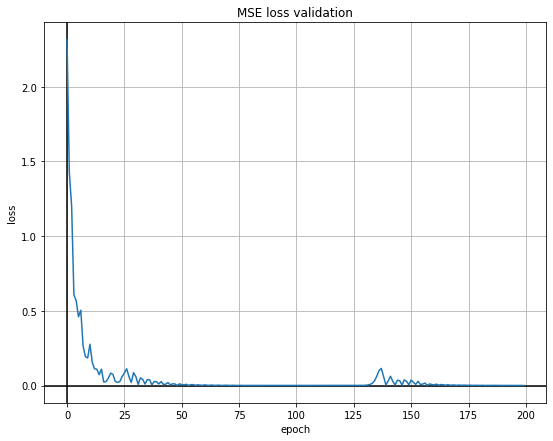

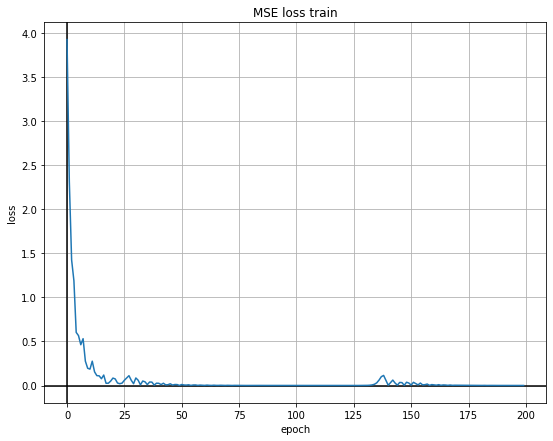

In [23]:
nn_ode_solver.make_report()

$$y''''+ y'' = \frac{1 + sin^2(x)}{cos^3(x)}$$
$$ y(0) = 1 $$
$$ y'(0) = 0 $$
$$ y''(0) = 0 $$
$$ y'''(0) = 0 $$
$$ true\_sol =  cos(x) + ln(cos(x))*cos(x) + x * sin(x)$$

In [24]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 4)
    + nth_derivative(function, variable, 2)
    - (torch.tensor([1.0],requires_grad=True) + torch.sin(variable)*torch.sin(variable))/(torch.cos(variable))**3
)
n_points = 20
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

fourth_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,3)
fourth_init_cond = OnePointInitialCondition(left_bound, fourth_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond, fourth_init_cond]

true_solution = lambda x: torch.cos(x) + torch.log(torch.cos(x))* torch.cos(x) + x * torch.sin(x)
nn_ode_solver = NNSolver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/199:
train Loss: 12.9344
valid Loss: 8.2314
Epoch 1/199:
train Loss: 9.7604
valid Loss: 7.1490
Epoch 2/199:
train Loss: 8.5451
valid Loss: 4.8357
Epoch 3/199:
train Loss: 6.0306
valid Loss: 4.0058
Epoch 4/199:
train Loss: 4.9388
valid Loss: 4.6671
Epoch 5/199:
train Loss: 5.2315
valid Loss: 3.5138
Epoch 6/199:
train Loss: 3.8822
valid Loss: 2.5385
Epoch 7/199:
train Loss: 3.2421
valid Loss: 2.3203
Epoch 8/199:
train Loss: 2.9840
valid Loss: 2.0408
Epoch 9/199:
train Loss: 2.2793
valid Loss: 2.9299
Epoch 10/199:
train Loss: 2.9912
valid Loss: 17.9577
Epoch 11/199:
train Loss: 17.1752
valid Loss: 5.1427
Epoch 12/199:
train Loss: 5.8734
valid Loss: 8.9950
Epoch 13/199:
train Loss: 10.3398
valid Loss: 9.5544
Epoch 14/199:
train Loss: 11.0302
valid Loss: 9.2192
Epoch 15/199:
train Loss: 10.7034
valid Loss: 8.5832
Epoch 16/199:
train Loss: 10.0433
valid Loss: 7.7835
Epoch 17/199:
train Loss: 9.2047
valid Loss: 6.8533
Epoch 18/199:
train Loss: 8.2188
valid Loss: 5.8070
Epoch 19/199:
t

train Loss: 0.0025
valid Loss: 0.0021
Epoch 157/199:
train Loss: 0.0026
valid Loss: 0.0025
Epoch 158/199:
train Loss: 0.0026
valid Loss: 0.0020
Epoch 159/199:
train Loss: 0.0025
valid Loss: 0.0021
Epoch 160/199:
train Loss: 0.0024
valid Loss: 0.0021
Epoch 161/199:
train Loss: 0.0024
valid Loss: 0.0019
Epoch 162/199:
train Loss: 0.0025
valid Loss: 0.0022
Epoch 163/199:
train Loss: 0.0025
valid Loss: 0.0019
Epoch 164/199:
train Loss: 0.0024
valid Loss: 0.0020
Epoch 165/199:
train Loss: 0.0023
valid Loss: 0.0020
Epoch 166/199:
train Loss: 0.0023
valid Loss: 0.0019
Epoch 167/199:
train Loss: 0.0023
valid Loss: 0.0021
Epoch 168/199:
train Loss: 0.0023
valid Loss: 0.0018
Epoch 169/199:
train Loss: 0.0023
valid Loss: 0.0019
Epoch 170/199:
train Loss: 0.0022
valid Loss: 0.0019
Epoch 171/199:
train Loss: 0.0022
valid Loss: 0.0018
Epoch 172/199:
train Loss: 0.0022
valid Loss: 0.0020
Epoch 173/199:
train Loss: 0.0022
valid Loss: 0.0017
Epoch 174/199:
train Loss: 0.0022
valid Loss: 0.0019
Epoch 17

Train max absolute error: 0.001384735107421875
Valid max absolute error: 0.001370549201965332
Mean average percentage error on train data: 0.07810705900192261 %
Mean average percentage error on validation data: 0.07673153281211853 %


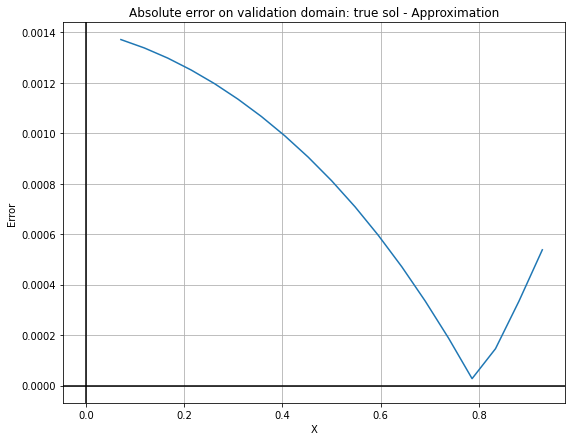

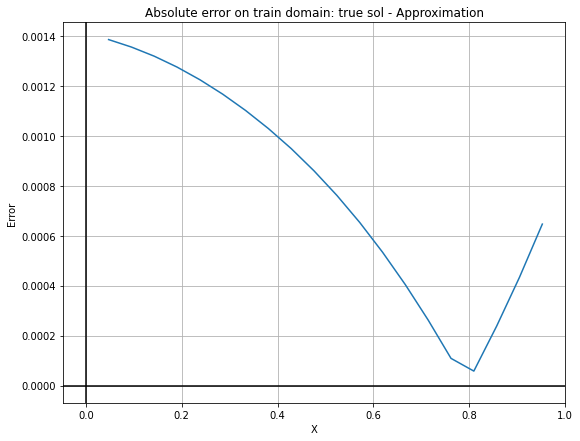

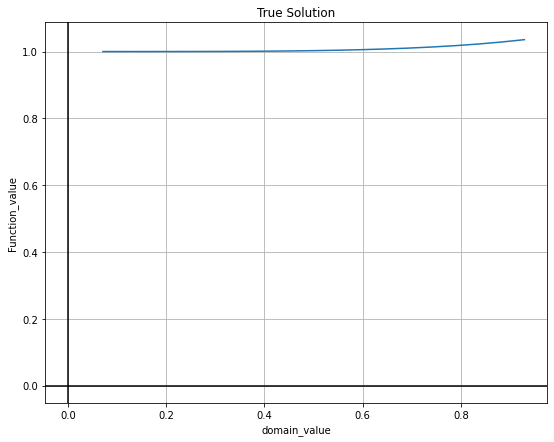

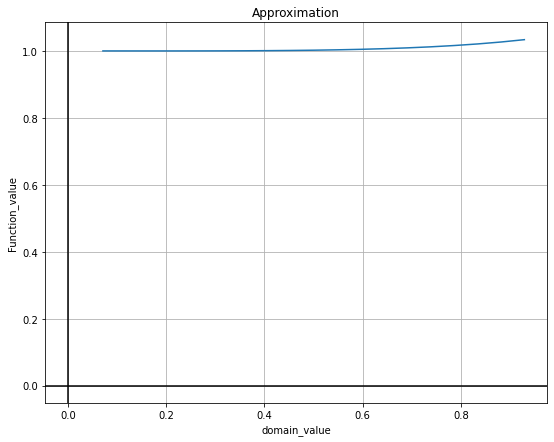

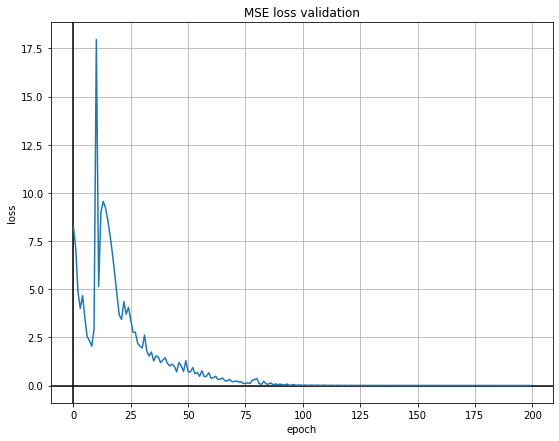

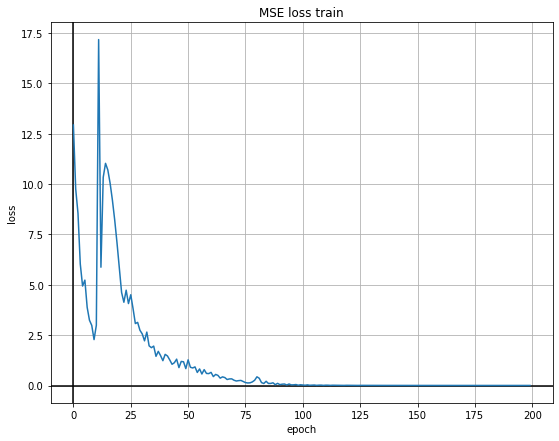

In [25]:
nn_ode_solver.make_report()

$$y'''+ y' = x*sin(x) + 3*cos(x)$$
$$ y(0) = 1$$
$$ y'(0) = 2 $$
$$ y''(0) = 0 $$
$$ true\_sol =  1/4 * (-(x^2 - 17) * sin(x) - 9 * x * cos(x) + 4)$$

In [26]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function, variable, 3)
    + nth_derivative(function, variable, 1)
    - variable * torch.sin(variable) - 3 * torch.cos(variable)
)
n_points = 20
main_eq = MainEquation(left_bound, right_bound, n_points, main_eq_residual)

first_init_cond_res = lambda x, nn_model_value: nn_model_value - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,1) - torch.tensor([2.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model_value: nth_derivative(nn_model_value,x,2)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

true_solution = lambda x: 1/4*(-(x**2-17)*torch.sin(x)-9*x*torch.cos(x)+4)
nn_ode_solver = NNSolver(main_eq, boundary_conditions, true_solution)
nn_ode_solver.fit()

Epoch 0/199:
train Loss: 12.7379
valid Loss: 8.2607
Epoch 1/199:
train Loss: 8.2651
valid Loss: 3.2072
Epoch 2/199:
train Loss: 3.2756
valid Loss: 19.0868
Epoch 3/199:
train Loss: 19.1038
valid Loss: 2.8731
Epoch 4/199:
train Loss: 3.0248
valid Loss: 4.9393
Epoch 5/199:
train Loss: 4.9772
valid Loss: 7.0917
Epoch 6/199:
train Loss: 7.1145
valid Loss: 8.0248
Epoch 7/199:
train Loss: 8.0458
valid Loss: 8.0343
Epoch 8/199:
train Loss: 8.0588
valid Loss: 7.4521
Epoch 9/199:
train Loss: 7.4863
valid Loss: 6.4155
Epoch 10/199:
train Loss: 6.4679
valid Loss: 4.9508
Epoch 11/199:
train Loss: 5.0302
valid Loss: 3.1753
Epoch 12/199:
train Loss: 3.2812
valid Loss: 1.6598
Epoch 13/199:
train Loss: 1.7669
valid Loss: 1.7882
Epoch 14/199:
train Loss: 1.8442
valid Loss: 2.7992
Epoch 15/199:
train Loss: 2.8008
valid Loss: 1.8467
Epoch 16/199:
train Loss: 1.8718
valid Loss: 0.9624
Epoch 17/199:
train Loss: 1.0018
valid Loss: 1.1627
Epoch 18/199:
train Loss: 1.2068
valid Loss: 1.0511
Epoch 19/199:
train

train Loss: 0.0002
valid Loss: 0.0002
Epoch 157/199:
train Loss: 0.0002
valid Loss: 0.0002
Epoch 158/199:
train Loss: 0.0002
valid Loss: 0.0002
Epoch 159/199:
train Loss: 0.0002
valid Loss: 0.0002
Epoch 160/199:
train Loss: 0.0002
valid Loss: 0.0002
Epoch 161/199:
train Loss: 0.0002
valid Loss: 0.0002
Epoch 162/199:
train Loss: 0.0002
valid Loss: 0.0002
Epoch 163/199:
train Loss: 0.0002
valid Loss: 0.0001
Epoch 164/199:
train Loss: 0.0002
valid Loss: 0.0001
Epoch 165/199:
train Loss: 0.0002
valid Loss: 0.0001
Epoch 166/199:
train Loss: 0.0002
valid Loss: 0.0001
Epoch 167/199:
train Loss: 0.0002
valid Loss: 0.0001
Epoch 168/199:
train Loss: 0.0002
valid Loss: 0.0001
Epoch 169/199:
train Loss: 0.0002
valid Loss: 0.0001
Epoch 170/199:
train Loss: 0.0002
valid Loss: 0.0001
Epoch 171/199:
train Loss: 0.0002
valid Loss: 0.0001
Epoch 172/199:
train Loss: 0.0002
valid Loss: 0.0001
Epoch 173/199:
train Loss: 0.0002
valid Loss: 0.0001
Epoch 174/199:
train Loss: 0.0002
valid Loss: 0.0001
Epoch 17

Train max absolute error: 0.000835418701171875
Valid max absolute error: 0.0008063316345214844
Mean average percentage error on train data: 0.02024001069366932 %
Mean average percentage error on validation data: 0.020071065053343773 %


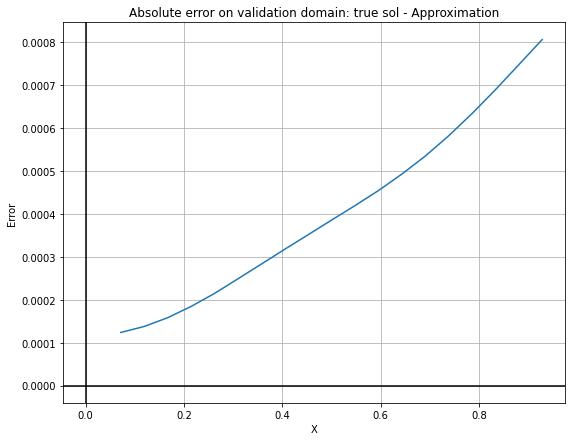

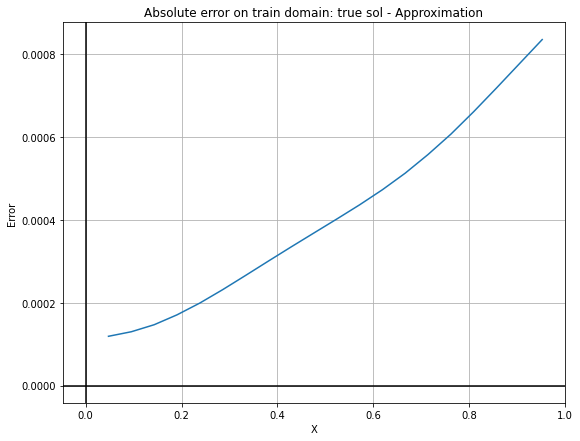

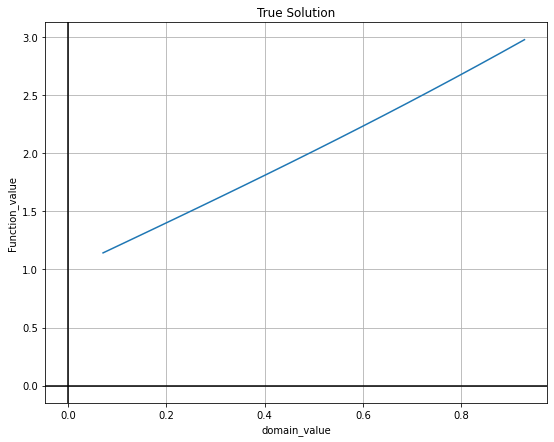

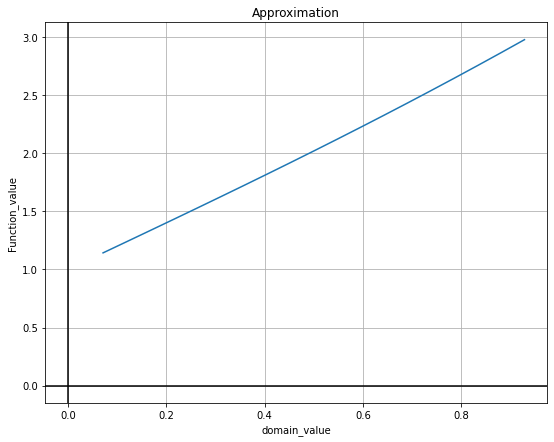

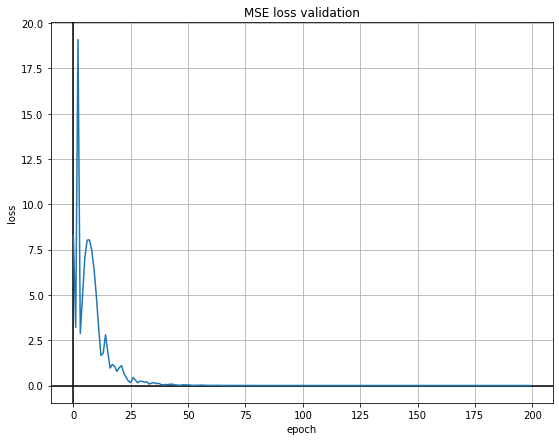

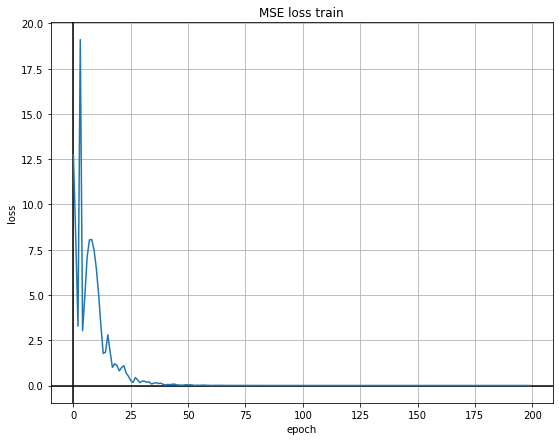

In [27]:
nn_ode_solver.make_report()